***
***
***
***

# <FONT SIZE=7 COLOR="#0f4c5c">  **Modeling of Dynamical Systems - First Notebook** </FONT>

***

**_By : Laura Valentina Gonzalez Rodriguez_**


***
***
***


In [ ]:
# Import the necessary libraries.
import math
import random
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
from collections import Counter
from matplotlib import rc
%matplotlib inline

In [ ]:
# FIX THE IDENTITY LINE  > /dev/null
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


***
***
***

## <FONT SIZE=6 COLOR="#fe7f2d">  **Definitions to understand what is happening** </FONT>

***
***
***

### **1. Discrete Dynamical System**

A **discrete dynamical system** is a mathematical model used to describe how a variable or a set of variables evolve over discrete time steps. It consists of a rule or equation that relates the current state of the system to its future state. In the context of a single variable, the evolution equation can be written as:

$x_{n+1} = f(x_n)$

where:
- $x_n$ represents the state of the system at time step $n$.
- $f$ is a function that defines how the system's state changes from $x_n$ to $x_{n+1}$.

###  **2. Point**

In the realm of discrete dynamical systems, a "point" or "state" refers to a specific value that represents the system's condition at a given time step. Mathematically, a point can be represented as a single value or a vector of values that describe the variables characterizing the system. Points serve as the foundation for studying the evolution and behavior of the system as it progresses through successive time steps.

###  **3. Fixed Point**

A **fixed point** of a discrete dynamical system is a value at which the system remains unchanged after a single time step. In other words, it's a solution to the equation $x_{n+1} = x_n$, or equivalently, $f(x) = x$. Fixed points are important because they represent equilibrium states where the system's behavior remains constant over time.

### **4. Orbit**

An **orbit** in a discrete dynamical system is the sequence of states that the system passes through as it evolves over time steps. Given the initial state $x_0$ and the transition function $f$, the orbit is generated by repeatedly applying $f$ to the current state:

$x_{n+1} = f(x_n)$

Orbits provide insight into how the system's state changes and behaves over time, showcasing patterns, convergence, or chaos depending on the system's properties.

### **5. Periodic**

In discrete dynamical systems, a behavior is **periodic** if the system's state repeats itself in a regular manner after a fixed number of time steps. Mathematically, a state $x_0$ belongs to a periodic orbit of period $p$ if:

$x_{p} = x_0$

This means that after $p$ time steps, the state of the system returns to its original value. A periodic behavior can involve a single state and its repetitions over time.

### **6. Periodic Point**

A **periodic point** in a discrete dynamical system is a specific state that returns to itself after a certain number of time steps. Mathematically, a state $x$ is a periodic point of period $p$ if:

$f^p(x) = x$

Where $f^p$ denotes applying the transition function $f$ $p$ times. Periodic points contribute to periodic orbits and can illustrate the system's recurring behaviors.

### **7. Periodic Orbit**

A **periodic orbit** of a discrete dynamical system is a sequence of states that repeat after a certain number of time steps, forming a closed trajectory. In mathematical terms, a state $x_0$ belongs to a periodic orbit of period $p$ if:

$x_{p} = x_0$ and $x_{k+p} = x_k$ for all $k$.

This definition requires that not only does the state return to its initial value after $p$ time steps, but the entire sequence of states repeats cyclically. A periodic orbit captures the entire trajectory formed by the repeated states.

### **8. Eventually Fixed Point**

An **eventually fixed point** in a discrete dynamical system is a state that, after a certain number of time steps, remains unchanged for all subsequent time steps. Mathematically, for a state $x_0$ and a time step $T$, the condition for an eventually fixed point is:

$x_{n+T} = x_T$

for all $n \geq T$. This means that the system may undergo transient behavior, but it eventually settles into the fixed state $x_T$ and remains there indefinitely.

The concept of an eventually fixed point reflects the idea that while the system may exhibit dynamic behavior initially, it will eventually reach and maintain a constant state.

### **9. Stable**

In the context of discrete dynamical systems, a state $x^*$ is considered **stable** if, when the system starts in a nearby state, it eventually gets and remains close to $x^*$ as time progresses. Mathematically, for a small perturbation $d$ and a time step $n$, the condition for stability is:

$|x_n - x^*| \leq d$ for all sufficiently large $n$.

Stable states are characterized by their ability to attract nearby states, causing the system to converge towards them over time. In a graph of the state space, trajectories originating close to a stable point tend to cluster around it as time evolves.

### **10. Stable Fixed Orbit**

A **stable fixed orbit** in a discrete dynamical system refers to a periodic orbit where the states in the orbit converge towards the underlying fixed point as time progresses. Mathematically, for a fixed point $x^*$ and a periodic orbit with period $p$, the condition for stability is:

$ \lim_{n \to \infty} x_{np + k} = x^* $ for all $ k $, where $ x_{np + k} $ represents the state of the system at time step $ np + k $.

A stable fixed orbit demonstrates that the states in the orbit not only repeat periodically but also approach a fixed point in a convergent manner. This behavior is indicative of a system that, even though oscillating, settles into a consistent equilibrium state over time.


Certainly! Here's a comprehensive definition of stability for a fixed point within the context of discrete dynamical systems:

### **11. Stability of a Fixed Point**

In a discrete dynamical system described by the transition function $f(x)$, a **fixed point** $x^*$ is considered **stable** if small perturbations in the initial state result in trajectories that remain close to $x^*$ as time progresses. Mathematically, a fixed point $x^*$ is stable if, for any small positive value $\epsilon$, there exists a positive integer $N$ such that for all $n \geq N$ and for any initial state $x_0$ satisfying $|x_0 - x^*| < \epsilon$, the following inequality holds:

$ |x_n - x^*| < \epsilon $

where $x_n$ represents the state of the system at time step $n$.

In simpler terms, a stable fixed point remains a point of attraction for states that start nearby. If a system starts close to a stable fixed point, its subsequent evolution will keep it close to that point.

There are different levels of stability, including asymptotic stability (where the system converges to the fixed point as $n$ goes to infinity) and Lyapunov stability (where the trajectories do not move too far from the fixed point).

### **12. Asymptotically Stable**

In discrete dynamical systems, a state $x^*$ is **asymptotically stable** if it is both stable and attracts nearby states as time progresses. Mathematically, for a small perturbation $d$ and a time step $n$, the conditions for asymptotic stability are:

1. The states converge to the fixed point:
   $ \lim_{n \to \infty} x_n = x^* $

2. Nearby states converge to the fixed point as well:
   $ \lim_{n \to \infty} |x_n - x^*| = 0 $

Asymptotic stability implies that not only do the states tend to the fixed point, but the distance between the states and the fixed point diminishes over time. This behavior guarantees that the system approaches the fixed point and settles into it as time goes on.

### **13. Unstable Fixed Orbit**

An **unstable fixed orbit** in a discrete dynamical system refers to a periodic orbit where the states in the orbit move away from the underlying fixed point as time progresses. Mathematically, for a fixed point $x^*$ and a periodic orbit with period $p$, the condition for instability is:

$ \lim_{n \to \infty} x_{np + k} \neq x^* $

for at least one $ k $, where $ x_{np + k} $ represents the state of the system at time step $ np + k $.

An unstable fixed orbit demonstrates that small deviations from the orbit can lead to states diverging from the fixed point. This behavior indicates that the system's trajectory is inherently unstable, as even slight perturbations result in states moving away from the equilibrium.

### **14. Omega-Limit**

The **omega-limit set** of a point $x$ in a discrete dynamical system is the set of states that the system's trajectory approaches as time progresses ($n$ goes to infinity). Mathematically, for a point $x$, the omega-limit set is denoted as $ \omega(x) $ and defined as:

$ \omega(x) = \{ y \mid \exists \{n_k\}: x_{n_k} \rightarrow y \text{ as } n_k \rightarrow \infty \} $

In simpler terms, the omega-limit set contains all the states that the system's trajectory eventually approaches as time evolves. It helps characterize the long-term behavior and potential attractors of the system starting from the initial state $x$.

### **15. Alfa-Limit**

The **alpha-limit set** of a point $x$ in a discrete dynamical system is the set of states from which the system's trajectory approaches $x$ as time progresses ($n$ goes to negative infinity). Mathematically, for a point $x$, the alpha-limit set is denoted as $ \alpha(x) $ and defined as:

$ \alpha(x) = \{ y \mid \exists \{n_k\}: x_{n_k} \rightarrow y \text{ as } n_k \rightarrow -\infty \} $

In simpler terms, the alpha-limit set contains all the states that eventually approach the initial state $x$ as time progresses backwards in the negative direction. It helps characterize the history and origin points of the system's trajectory.

### **16. Basin of Attraction**

The **basin of attraction** of a fixed point $x^*$ in a discrete dynamical system is the set of initial states that, when evolved over time, converge to $x^*$ as time progresses ($n$ goes to infinity). Mathematically, the basin of attraction $B(x^*)$ is defined as:

$ B(x^*) = \{ x \mid \lim_{n \to \infty} x_n = x^* \} $

In simpler terms, the basin of attraction represents the region in the state space from which the system's trajectories lead to the specific fixed point $x^*$ as time evolves. It helps characterize the stability and convergence behavior of the system towards that fixed point.

### **17. Attractor**

An **attractor** in a discrete dynamical system is a subset of the state space that represents a recurring or persistent behavior that trajectories tend to approach as time progresses. Attractors can take various forms, such as points, periodic orbits, or more complex structures like strange attractors in chaotic systems. Trajectories within the basin of attraction of an attractor eventually get closer to, or remain within, the attractor's region in the state space. Mathematically, an attractor is defined as:

A subset $A \subseteq X$ is called an attractor of $f$ if, for any open neighborhood $U$ of $A$, there exists a positive integer $N$ such that $f^n(x) \in U$ for all $x \in X$ and $n \geq N$.

Attractors provide valuable insights into the long-term behavior and tendencies of a dynamic system. They help classify and understand the characteristic patterns or states that a system exhibits over time.

### **18. Invariant Set**

An **invariant set** in a discrete dynamical system is a set of states that, when evolved over time, remains entirely within itself. Mathematically, for a set $S$, it is invariant if:

$ x \in S \Rightarrow f(x) \in S $

where $f$ is the transition function of the system. In other words, all states in the set $S$ stay within $S$ after applying the transition function.

Invariant sets can be used to describe subsets of the state space that capture certain properties of the system's dynamics. These sets can range from points and periodic orbits to more complex structures, and they help characterize the behavior and structure of the system over time.

### **19. Bifurcation**

**Bifurcation** in a discrete dynamical system refers to a qualitative change in the behavior of the system as a parameter is varied. During a bifurcation, the number, stability, or types of attractors may change, leading to the emergence of new behaviors. Bifurcations are critical points where the dynamics of the system undergo significant shifts. They can lead to the creation of new fixed points, periodic orbits, or chaotic behavior.

### **20. Chaotic Behavior**

**Chaotic behavior** in a discrete dynamical system refers to a complex and highly sensitive behavior that arises from deterministic rules. Chaotic systems exhibit extreme sensitivity to initial conditions, leading to unpredictability over long periods of time. Even though the underlying dynamics are governed by deterministic equations, small differences in initial conditions can lead to drastically different trajectories. Chaotic behavior often manifests as irregular, seemingly random, and non-repetitive patterns.

***
***
***

## <FONT SIZE=6 COLOR="#fe7f2d">  **Linear Models** </FONT>

Let's observe the values of the function and its corresponding graph.

In [ ]:
f = lambda x: x**3#f(x)=x^3
for x in range(0,15):
    print (x, f(x))

0 0
1 1
2 8
3 27
4 64
5 125
6 216
7 343
8 512
9 729
10 1000
11 1331
12 1728
13 2197
14 2744


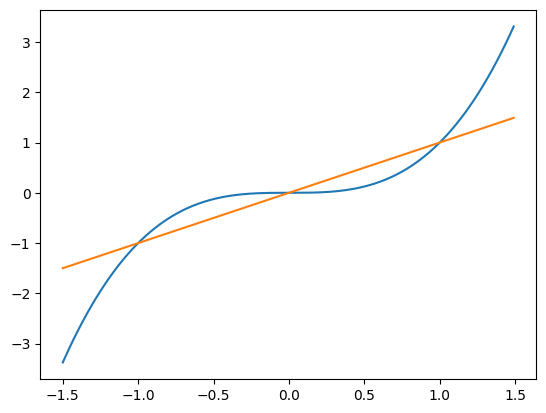

In [ ]:
t = np.arange(-1.5, 1.5, 0.01)
plt.plot(t, t**3)
plt.plot(t, t)

The relevant observation lies in the fact that the cubic function under consideration intersects the identity line at three distinct points. Each of these points of intersection, which we will refer to as fixed points, represents values of the variable where the cubic function and the identity line coincide, this means $f(x) = x$.

**Classify all possible behaviors for a fixed point of a linear function**

First, we will define the functions and classes that will help us draw cobweb diagrams, allowing us to start experimenting.

This Python code snippet sets up the plotting style to use LaTeX fonts and then defines a class called `AnnotatedFunction` that represents a mathematical function. This class is callable and stores the function along with its LaTeX label. Additionally, the `plot_cobweb` function is introduced, which creates a cobweb plot to visualize the iteration of a function. The plot shows the functions and iterates the given function from a starting point x0, displaying the resulting trajectory. Formatting adjustments are applied to the plot, including minor ticks, gridlines, and axis labels, before displaying the final plot.

In [ ]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)

# Figure dpi
dpi = 72

class AnnotatedFunction:
    """A small class representing a mathematical function.

    This class is callable so it acts like a Python function, but it also
    defines a string giving its latex representation.

    """

    def __init__(self, func, latex_label):
        self.func = func
        self.latex_label = latex_label

    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)

def plot_cobweb(f, x0, nmax=40, lim_inferior=0, lim_superior=1):
    """Make a cobweb plot.

    Plot y = f(x) and y = x, and illustrate the behavior of iterating x = f(x)
    starting at x = x0.

    """
    x = np.linspace(lim_inferior, lim_superior, 5000)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x), c='#444444', lw=2)
    ax.plot(x, x, c='#FF0000', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1])
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$x$')
    ax.set_ylabel(f.latex_label)
    ax.set_title('$x_0 = {:.1}$'.format(x0))

    plt.show()

***
***

### <FONT SIZE=5 COLOR="#fcca46">  **1. Stable Fixed Point** </FONT>

***

#### <FONT SIZE=4 COLOR="#619b8a">  **Normal Stable Fixed Point** </FONT>

Empirically, we will consider the following examples:



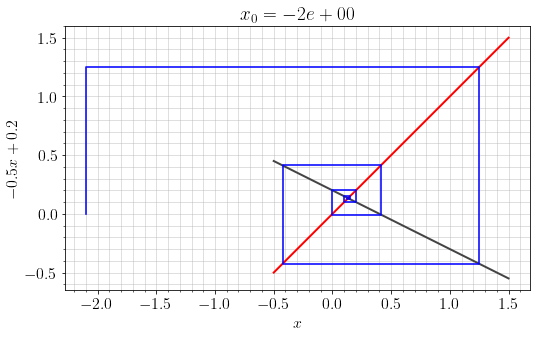

In [ ]:
# Define your linear function
def linear_function(x):
    return -0.5 * x + 0.2

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$-0.5x + 0.2$')

# Cobweb plot parameters
x0 = -2.1
nmax = 40

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,-0.5,1.5)

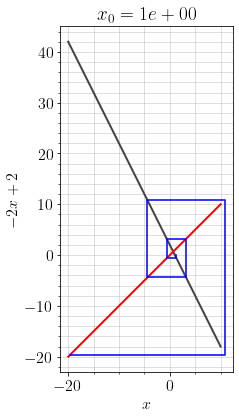

In [ ]:
# Define your linear function
def linear_function(x):
    return -2 * x + 2

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$-2x + 2$')

# Cobweb plot parameters
x0 = 1.3
nmax = 10

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,-20,10)

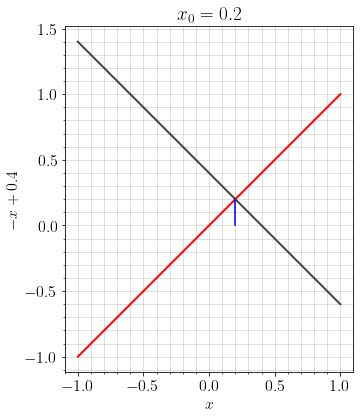

In [ ]:
# Define your linear function
def linear_function(x):
    return -1 * x + 0.4

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$-x + 0.4$')

# Cobweb plot parameters
x0 = 0.2
nmax = 40

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,-1)

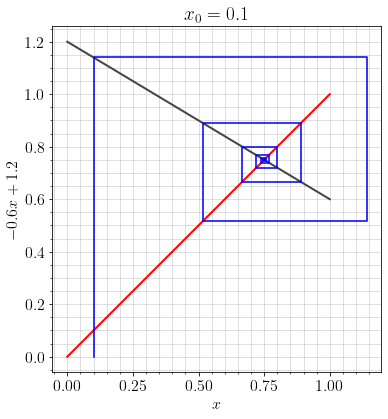

In [ ]:
# Define your linear function
def linear_function(x):
    return -0.6 * x + 1.2

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$-0.6x + 1.2$')

# Cobweb plot parameters
x0 = 0.1
nmax = 40

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax)

It has been observed that when the parameter $a$ in the equation $f(x) = a \cdot x(k) + b$ satisfies the condition $a < 1$, the system exhibits a convergent behavior towards a specific point. This phenomenon is visually manifested as a characteristic pattern of squares that gradually concentrate around a central point on the graph.

This pattern of squares converging towards the center is a visual manifestation of how the influence of the $a$ value acts to attract the iterations of the system towards a stable point. It's important to emphasize that this convergence property is limited to the specific range of $a$ values that are less than 1.

Mathematically, a fixed point $x$ is considered an attractor when the slope $a$ of the linear function satisfies $a < 1$. In this case, when iterations of the function are performed, values close to $x$ will approach it more and more. The fixed point acts as a point of convergence for nearby initial values. As demonstrated earlier, the behavior of the function as $x$ tends to infinity will be of the form $x = ax + b \Rightarrow -b = ax - x \Rightarrow x = \frac{b}{1 - a}$.

****

#### <FONT SIZE=4 COLOR="#619b8a">  **Trivial Stable Fixed Point** </FONT>


Empirically, we will consider the following examples:

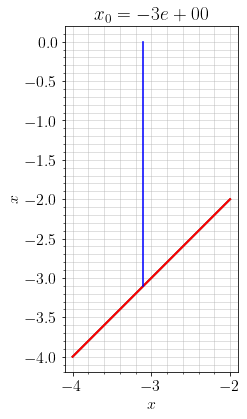

In [ ]:
# Define your linear function
def linear_function(x):
    return x

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$x$')

# Cobweb plot parameters
x0 = -3.1
nmax = 40

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,-4,-2)

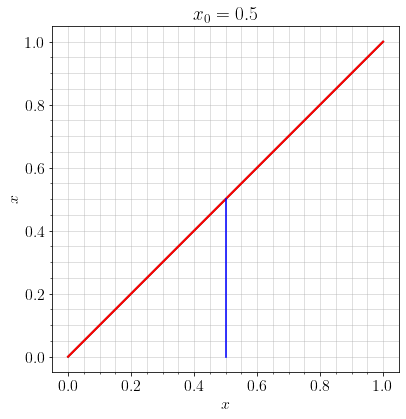

In [ ]:
# Define your linear function
def linear_function(x):
    return x

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$x$')

# Cobweb plot parameters
x0 = 0.5
nmax = 40

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax, 0,1)

In the realm of dynamic systems, it has been observed that when the function $f(x) = a \cdot x(k) + b$ is set with the values $a = 1$ and $b = 0$, a particular situation arises where a unique fixed point is identified. This fixed point directly corresponds to the initial value used in the function.

The value $a = 1$ in this equation implies that subsequent iterations will simply keep the value of $x(k)$ unchanged, as it will be multiplied by 1. As a result, the system will stabilize at a single point: the original value with which the function was initiated.

In mathematical terms, this translates to a constant solution in the dynamic equation. Each subsequent iteration will not modify the value of $x(k)$, and therefore, the system will not exhibit changes or evolutions over time.

***
***


### <FONT SIZE=5 COLOR="#fcca46">  **2. Unstable Fixed Point** </FONT>

***

#### <FONT SIZE=4 COLOR="#619b8a">  **Normal Unstable Fixed Point** </FONT>

Empirically, we will consider the following examples:

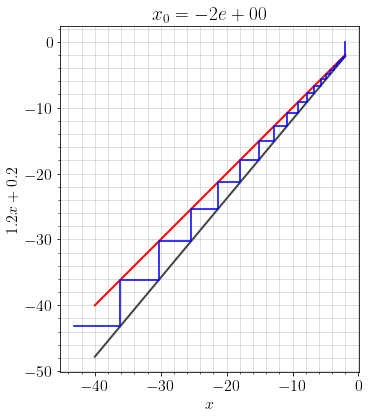

In [ ]:
# Define your linear function
def linear_function(x):
    return 1.2 * x + 0.2

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$1.2x + 0.2$')

# Cobweb plot parameters
x0 = -2.1
nmax = 40

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,-40,-2)

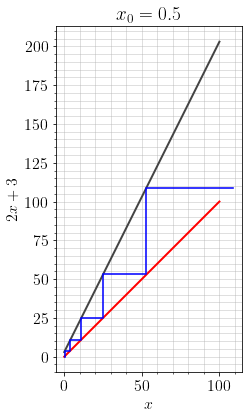

In [ ]:
# Define your linear function
def linear_function(x):
    return 2 * x + 3

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$2x + 3$')

# Cobweb plot parameters
x0 = 0.5
nmax = 10

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,0,100)

In the context of dynamic systems, we have observed that when the parameter $a$ in the equation $f(x) = a \cdot x(k) + b$ surpasses the value of 1, the system exhibits a divergent behavior. This tendency is visually manifested as a characteristic pattern of squares that progressively move away from the central point on the graph.

The pattern of squares steadily moving away from the center of the graph is a visual manifestation of how the influence of the $a$ value acts to propagate the iterations of the system over time. It's important to emphasize that this divergence property specifically applies to $a$ values that exceed 1. If $a$ is below this threshold, the behavior of the system could vary significantly, giving rise to other types of evolution or convergence.

Mathematically, a fixed point $x$ is considered a repulsor when the slope $a$ of the linear function satisfies $|a| > 1$. In this case, values close to $x$ will move farther away from it as they are iterated. The fixed point acts as a point of divergence for nearby initial values.

***

#### <FONT SIZE=4 COLOR="#619b8a">  **Unestable Fixed Point Derived from the Trivial Stable Fixed Point** </FONT>

Empirically, we will consider the following examples:

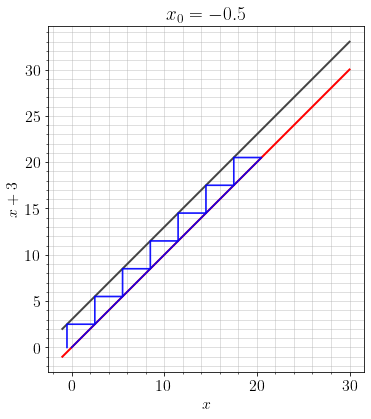

In [ ]:
# Define your linear function
def linear_function(x):
    return x + 3

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$x + 3$')

# Cobweb plot parameters
x0 = -0.5
nmax = 15

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,-1,30)

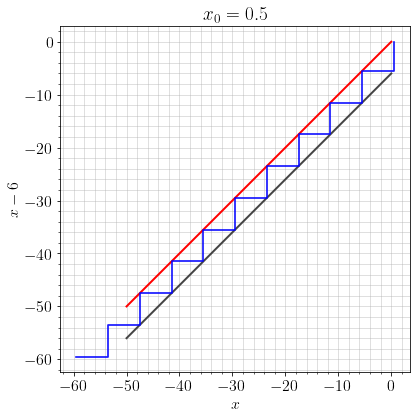

In [ ]:
# Define your linear function
def linear_function(x):
    return x -6

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$x -6$')

# Cobweb plot parameters
x0 = 0.5
nmax = 20

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,-50,0)

Within the context of dynamic systems, an intriguing behavior has been noticed when considering the function $f(x) = a \cdot x(k) + b$, specifically when we assign the value $a = 1$ and $b$ is nonzero. In this particular setup, a pattern of divergence manifests itself, leading the system to follow a constant trajectory between two parallel lines.

The choice of $a = 1$ implies that in each iteration, the value of $x(k)$ is simply added to the constant value $b$. This means that each successive step in the system's evolution adds a constant amount to the current value of $x(k)$.

This behavior has an interesting consequence. Since $b$ is nonzero, each iteration will either add or subtract a constant amount to the value of $x(k)$, depending on whether $b$ is positive or negative. As a result, the system will continuously move away in one direction, following a linear trajectory.

The presence of the two parallel lines is connected to this divergence trajectory. Essentially, the parallel lines act as "barriers" that limit the expansion of the system. As the iterations continue, the system moves farther and farther away from its starting point, but its evolution is bounded by these two lines, maintaining a constant distance.

***
***

### <FONT SIZE=5 COLOR="#fcca46">  **3. Indifferent Fixed Point - Orbit Periodic** </FONT>

Empirically, we will consider the following examples:

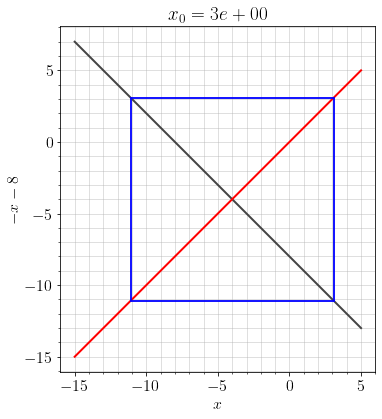

In [ ]:
# Define your linear function
def linear_function(x):
    return -1 * x - 8

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$-x -8$')

# Cobweb plot parameters
x0 = 3.1
nmax = 40

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,-15,5)

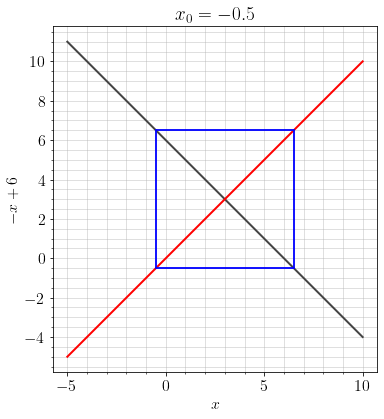

In [ ]:
# Define your linear function
def linear_function(x):
    return -1 * x +6

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$-x + 6$')

# Cobweb plot parameters
x0 = -0.5
nmax = 40

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,-5,10)

In the context of dynamic systems, we have identified an interesting behavior when considering the function $f(x) = a \cdot x(k) + b$, where we choose $a = -1$ and an initial value $x_0$ different from $\frac{b}{2}$. In this specific configuration, a pattern of periodic oscillation emerges, indicating the existence of a periodic orbit.

The choice of $a = -1$ has a notable effect on the system's iterations. Each time we apply the function, the value of $x(k)$ is inverted in its sign due to the coefficient $a$, essentially equivalent to a reflection around the origin. This implies that the system will oscillate between positive and negative values in each iteration.

However, the choice of $x_0$ different from $\frac{b}{2}$ introduces an imbalance in the system. This means that the resulting periodic orbit won't be centered exactly at $\frac{b}{2}$. Instead, the center of the square it oscillates within is located at the point where the function $f(x)$ intersects the identity, namely the line $y = x$.

This relationship between the function and the identity is key to understanding the periodic nature of the orbit. The system will oscillate between two distinct values, reflecting around the identity in each iteration. Due to the choice of $a = -1$, the system experiences a sign inversion at each step, which creates the periodic oscillation. The difference between the initial value $x_0$ and the intersection point with the identity determines how the center of this oscillating pattern shifts.

***
***

### <FONT SIZE=5 COLOR="#fcca46">  **4. Other Fixed Point** </FONT>

***

#### <FONT SIZE=4 COLOR="#619b8a">  **Stable Fixed Point Derived from the Unstable Fixed Point** </FONT>

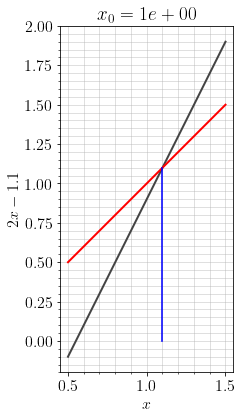

In [ ]:
# Define your linear function
def linear_function(x):
    return 2*x -1.1

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$2x -1.1$')

# Cobweb plot parameters
x0 = 1.1
nmax = 40

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax, 0.5,1.5)

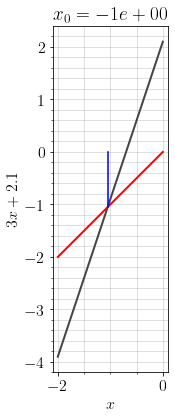

In [ ]:
# Define your linear function
def linear_function(x):
    return 3*x +2.1

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$3x+2.1$')

# Cobweb plot parameters
x0 = -1.05
nmax = 20

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax, -2,0)

Within the realm of dynamic systems, we have made relevant observations when considering the function $f(x) = a \cdot x(k) + b$, with a focus on the value of $a$ and the choice of initial value $x_0$. When we select a value $a$ greater than 1, but adjust the initial value $x_0$ to be $x_0 = \frac{b}{1 - a}$, an important feature emerges: a fixed point corresponding to $x = \frac{b}{1 - a}$.

The choice of $a > 1$ has a significant impact on the system's iterations. With each application of the function, the value of $x(k)$ is multiplied by a factor greater than 1, leading to exponential growth in its magnitude. This property of amplification is the key behind the divergence of the system in this configuration.

However, what makes this fixed point meaningful is the specific choice of $x_0$. By assigning $x_0 = \frac{b}{1 - a}$, we are selecting an initial value that exactly counteracts the influence of the exponential amplification caused by the value of $a$. In other words, this $x_0$ value is precisely the one for which successive iterations through the function keep the value of $x(k)$ constant at $x = \frac{b}{1 - a}$.

Mathematically, this choice of $x_0$ is derived from the balance between the amplification caused by $a > 1$ and the constant compensation introduced by $\frac{b}{1 - a}$. This fixed point is particularly noteworthy because, despite the amplification property of $a$, the system remains stationary and does not diverge. In other words, it is a point where the opposing forces of amplification and compensation are in equilibrium.

***

#### <FONT SIZE=4 COLOR="#619b8a">  **Stable Fixed Point Derived from Orbit Periodict** </FONT>

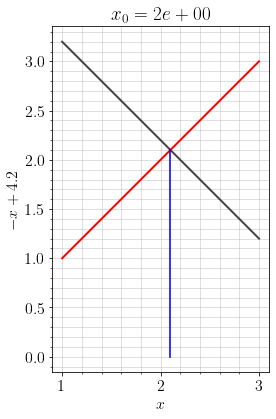

In [ ]:
# Define your linear function
def linear_function(x):
    return -x + 4.2

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$-x + 4.2$')

# Cobweb plot parameters
x0 = 2.1
nmax = 40

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,1,3)

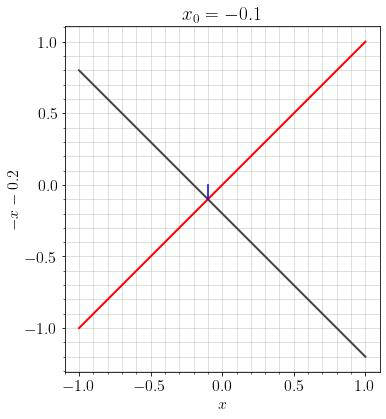

In [ ]:
# Define your linear function
def linear_function(x):
    return -x - 0.2

# Create an instance of the AnnotatedFunction class
linear_func = AnnotatedFunction(linear_function, r'$-x - 0.2$')

# Cobweb plot parameters
x0 = -0.1
nmax = 40

# Generate the cobweb plot
plot_cobweb(linear_func, x0, nmax,-1,1)

Within the realm of dynamic systems, we have discovered an interesting scenario when considering the function $f(x) = a \cdot x(k) + b$. In this specific case, if we set the value of $a$ as -1 and take the initial value $x_0$ equal to $\frac{b}{2}$, a situation arises that leads to a unique fixed point.

The value $a = -1$ in the equation triggers a particular behavior in the system's iterations. Every time we apply the function, the value of $x(k)$ undergoes a sign reversal due to the coefficient $a$, essentially representing a reflection around the origin. On the other hand, the initial value $x_0$ is set at $\frac{b}{2}$, adding a constant component.

These conditions combine in a way that, in each iteration, the value of $x(k)$ is reflected across the x-axis and shifted in the opposite direction due to multiplication by $a = -1$. However, the constant addition of $\frac{b}{2}$ partially counters this movement, eventually leading the system to converge towards a specific point.

The fixed point at $x_0 = \frac{b}{2}$ originates from this convergence. When we repeatedly apply the function, the system will oscillate around this value, alternating between reflection and shifting, but ultimately settling at $x_0 = \frac{b}{2}$. Mathematically, this condition is satisfied because in each iteration, the sign inversion caused by $a = -1$ is neutralized by the constant component $\frac{b}{2}$.

***
***

### <FONT SIZE=5 COLOR="#fcca46">  **5. Formal Definition and Proof** </FONT>


### **Proposition:**

If $f: R \rightarrow R$, $f: x \rightarrow ax+b$ is a linear function there is a single point $x^*$ if $a \neq 1$ and $x^{*} = \frac{b}{1-a}$

However, $a^*$ is stable if $a < 1$ and unstable if $a > 1$ and there is a single periodic orbit for $a = -1$.

### **Proof:**

A fixed point for $ax+b$ is given by:

$x = ax+b$

$-b = ax-x$

$x^{*} = \frac{b}{1-a}$

Now, comparing the slope $a$ to the critical value of 1:

- If $a < 1$, the fixed point $x^*$ is stable. This is because if you start with a value close to $x^*$, applying the function $f$ will bring you even closer to $x^*$ over successive iterations.

- If $a > 1$, the fixed point $x^*$ is unstable. In this case, starting with a value close to $x^*$, applying the function $f$ will take you farther away from $x^*$ with each iteration.

- If $a = -1$, the linear function becomes $f(x) = -x + b$. To find the periodic orbit, we need to determine the values of $x$ for which $f(f(x)) = x$:
$f(f(x)) = -(-x + b) + b = x.$
Solving this equation for $x$, we get:
$x = \frac{b}{2}.$ This means that there is a single periodic orbit at $x = \frac{b}{2}$ when $a = -1$.

Another form of proof is given by:

**If $a<1$:**

Given the linear function $f(x) = ax + b$, let's denote the fixed point as $x^* = \frac{b}{1 - a}$. Now, let $x = x^* + \epsilon$ be a point near $x^*$, where $\epsilon$ is a small perturbation.

We want to examine the behavior of $f(x) = ax + b$ around $x = x^*$. First, let's compute the value of $f(x)$ at $x = x^* + \epsilon$:

$f(x^* + \epsilon) = a(x^* + \epsilon) + b = ax^* + a\epsilon + b.$

Now, we can substitute the value of $x^* = \frac{b}{1 - a}$:

$f(x^* + \epsilon) = \frac{ab}{1 - a} + a\epsilon + b = \frac{ab + a\epsilon - ab + b(1 - a)}{1 - a} = \frac{a\epsilon + b(1 - a)}{1 - a}.$

Notice that the above expression can be rewritten as:

$f(x^* + \epsilon) = \frac{a}{1 - a}\epsilon + \frac{b(1 - a)}{1 - a} = \frac{a}{1 - a}\epsilon + b.$

Now, let's analyze the distance between $f(x^* + \epsilon)$ and $x^*$:

$\begin{align*}
|f(x^* + \epsilon) - x^*| &= \left|\frac{a}{1 - a}\epsilon + b - \frac{b}{1 - a}\right| \\
&= \left|\frac{a\epsilon}{1 - a}\right| \\
&= \frac{|a|}{|1 - a|}|\epsilon|.
\end{align*}$

Since $a < 1$, we know that $|a| < 1$ as well. Additionally, because $a \neq 1$, we have $|1 - a| > 0$. Therefore, $\frac{|a|}{|1 - a|} < 1$.

This means that for any small perturbation $\epsilon$, the distance between $f(x^* + \epsilon)$ and $x^*$ is always less than $|\epsilon|$, which indicates that $f(x^* + \epsilon)$ remains close to $x^*$.

In other words, if $a < 1$, then any small perturbation in the input $x$ around $x^*$ results in a smaller change in the output $f(x)$, demonstrating the stability of the fixed point $x^*$ under these conditions.

**If $a > 1$**

Given the linear function $f(x) = ax + b$ and the fixed point $x^* = \frac{b}{1 - a}$, let's consider a small perturbation $x = x^* + \epsilon$, where $\epsilon$ is a small positive value.

We want to examine the behavior of $f(x) = ax + b$ around $x = x^*$. First, let's compute the value of $f(x)$ at $x = x^* + \epsilon$:

$f(x^* + \epsilon) = a(x^* + \epsilon) + b = ax^* + a\epsilon + b.$

Substituting the value of $x^* = \frac{b}{1 - a}$:

$f(x^* + \epsilon) = \frac{ab}{1 - a} + a\epsilon + b.$

Now, let's analyze the distance between $f(x^* + \epsilon)$ and $x^*$:

$\begin{align*}
|f(x^* + \epsilon) - x^*| &= \left|\frac{ab}{1 - a} + a\epsilon + b - \frac{b}{1 - a}\right| \\
&= \left|\frac{ab + a\epsilon - ab + b(1 - a)}{1 - a}\right| \\
&= \left|\frac{a\epsilon + b(1 - a)}{1 - a}\right|.
\end{align*}$

Now, since $a > 1$, we have $a\epsilon > \epsilon$ and $b(1 - a) < 0$, because $1 - a$ is negative. Therefore, the above expression can be bounded from above as:

$\begin{align*}
|f(x^* + \epsilon) - x^*| &< \left|\frac{\epsilon + b(1 - a)}{1 - a}\right| \\
&= \frac{\epsilon - b(1 - a)}{1 - a}.
\end{align*}$

Now, since $a > 1$, we know that $1 - a < 0$, which implies that $b(1 - a) > 0$. Additionally, since $\epsilon$ is a positive value, we know that $\epsilon > 0$.

Putting it all together:

$\frac{\epsilon - b(1 - a)}{1 - a} < \frac{\epsilon}{1 - a} < 0.$

This means that for small positive perturbations $\epsilon$, the distance between $f(x^* + \epsilon)$ and $x^*$ is negative, indicating that $f(x^* + \epsilon)$ moves away from $x^*$.

In other words, if $a > 1$, then there exist small perturbations in the input $x$ around $x^*$ that lead to a decrease in the distance between $f(x)$ and $x^*$, demonstrating the instability of the fixed point $x^*$ under these conditions.

**If $a = -1$**

Let's start by examining the behavior of the function $f(x) = -x + b$. The fixed point of this function is given by $x^* = f(x^*)$, which leads to the equation $x^* = -x^* + b$, implying that $x^* = \frac{b}{2}$.

Now, let's analyze what happens when we iterate the function $f(x)$. Starting from any point $x_0$, the next point in the iteration sequence is $f(x_0)$, then $f(f(x_0))$, and so on. The iteration can be represented as follows:

$
\begin{align*}
x_0 &\rightarrow f(x_0) = -x_0 + b \\
f(x_0) &\rightarrow f(f(x_0)) = -f(x_0) + b = -(-x_0 + b) + b = x_0 \\
f(f(x_0)) &\rightarrow f(f(f(x_0))) = -f(f(x_0)) + b = -x_0 + b = f(x_0) \\
\end{align*}
$

As you can see, after two iterations, we return to the initial point $x_0$, creating a periodic orbit of period 2. This happens for any initial point $x_0$.

Therefore, for $a = -1$, the function $f(x) = -x + b$ exhibits a single periodic orbit of period 2.

***
***
***

## <FONT SIZE=6 COLOR="#fe7f2d">  **Quadratic Models** </FONT>


**Classify all possible behaviors for a fixed point of a cuadratic function $a\cdot x^2$**

First, we will define the functions that will help us draw cobweb diagrams, allowing us to start experimenting.

The code defines a quadratic function and then creates a graphical representation of the iteration of this function using the cobweb method. It utilizes point coordinates to draw lines connecting successive iterations on a plane. Additionally, it displays the quadratic function and the diagonal line on the same graph, along with starting and ending points highlighted in different colors. The result is a visualization of how the iterations of the quadratic function relate to the diagonal line and previous iterations.

In [ ]:
def f(x, a):
    return a * x**2

def cuadratic_cobweb(a, x0, n, lim_inf, lim_sup):
    x1 = x0
    cobweb_xs = [x1]
    cobweb_ys = [x1]
    for i in range(n):
        x2 = f(x1, a)
        cobweb_xs.append(x1)
        cobweb_ys.append(x2)
        x1 = x2
        cobweb_xs.append(x1)
        cobweb_ys.append(x2)
    graph_xs = np.linspace(lim_inf, lim_sup, 100)
    graph_ys = f(graph_xs, a)
    start = x1
    end = x2

    for i in range(1, len(cobweb_xs)):
        plt.plot([cobweb_xs[i - 1], cobweb_xs[i]], [cobweb_ys[i - 1], cobweb_ys[i]], 'k', alpha=0.2, linewidth=0.5)
    plt.plot([lim_inf, lim_sup], [lim_inf, lim_sup], 'k', linewidth=2)
    plt.plot(graph_xs, graph_ys, 'k', linewidth=3)
    plt.plot(x0, x0, 'go', zorder=5)
    plt.plot(x2, x2, 'ro', zorder=5)
    plt.text(x0 + 0.08, x0, 'Unstable', fontsize=12, color='green')
    plt.text(x2 + 0.08, x2, 'Stable', fontsize=12, color='red')

    ax = plt.gca()
    ax.set_aspect(1)
    ax.set_ylim(lim_inf, lim_sup)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(lim_inf, lim_sup)

    fig = ax.figure
    fig.set_figwidth(8)
    fig.set_figheight(8)

***
***

### <FONT SIZE=5 COLOR="#fcca46">  **1. One Stable and One Unstable Fixed Points** </FONT>


Empirically, we will consider the following examples:

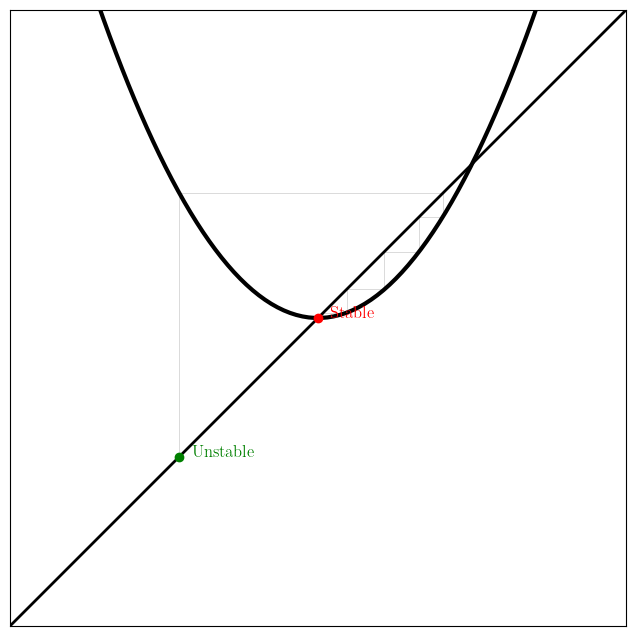

In [ ]:
cuadratic_cobweb(1,-0.9, 200,-2,2)
plt.show()

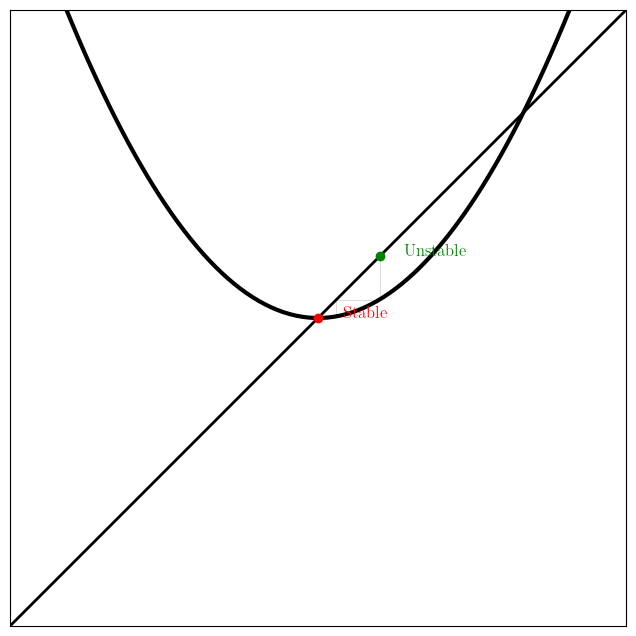

In [ ]:
cuadratic_cobweb(1.5,0.2, 200,-1,1)
plt.show()

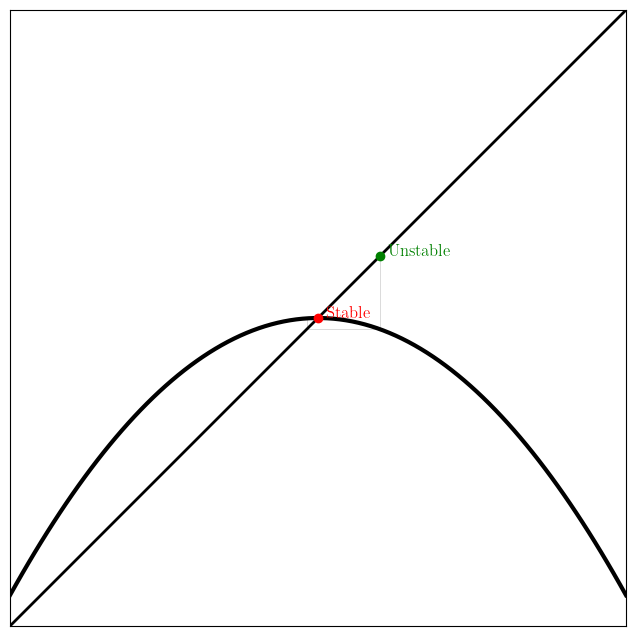

In [ ]:
cuadratic_cobweb(-0.3,0.6, 200,-3,3)
plt.show()

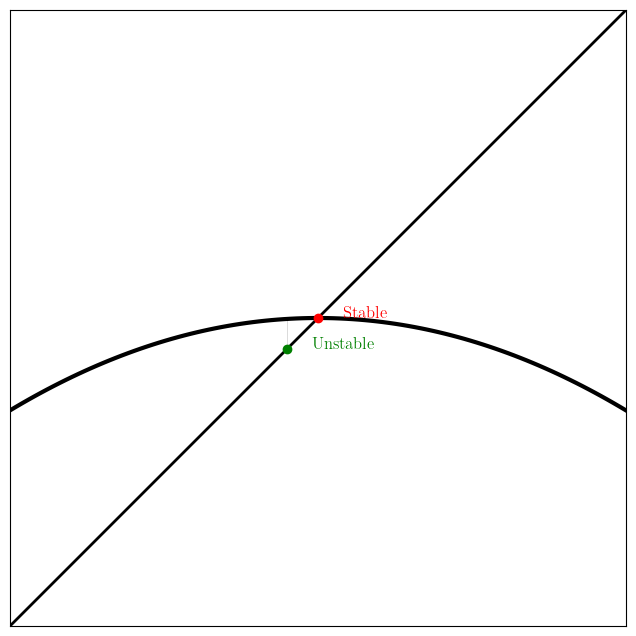

In [ ]:
cuadratic_cobweb(-0.3,-0.1, 200,-1,1)
plt.show()

In the context of quadratic functions represented by $f(x) = a \cdot x^2$, we have identified an interesting property that persists regardless of the value of $a$. In this setup, there always exists a pair of fixed points: one stable and the other unstable.

The existence of these fixed points remains constant, regardless of the value of $a$. As we vary $a$, the shape of the function's curve may change (become wider or narrower), but the critical points, which are $x = 0$ in this case, remain the same.

***
***

### <FONT SIZE=5 COLOR="#fcca46">  **2. Formal Definition and Proof** </FONT>

### **Proposition:**

If $f: R \rightarrow R$, $f: x \rightarrow ax^2$ is a quadratic with $a \in R$. Then we have one case:
- There are two fixed points $x^*=\frac{1}{a}$ a unstable point and  $x^*=0$ a stable point (when $x_0>0$).


### **Proof**

1. **Unstable Fixed Point at $x^* = \frac{1}{a}$:**
   We want to show that for any small positive value of $\epsilon$, there exists a $\delta$ such that if $|x_0 - \frac{1}{a}| < \delta$, then $|f^n(x_0) - \frac{1}{a}|$ grows larger as $n$ increases, indicating instability.

   First, calculate the derivative of the function:
   $$f'(x) = 2ax.$$

   Now, let's consider $x_0 > \frac{1}{a}$. Since $x_0$ is positive, we can choose $\delta = x_0 - \frac{1}{a}$.

   For any $n \geq 1$, we have:
   $$|f^n(x_0) - \frac{1}{a}| = |f(f^{n-1}(x_0)) - \frac{1}{a}| = |af^{n-1}(x_0)^2 - \frac{1}{a}|.$$

   Using the derivative, we can estimate $f^n(x_0)$:
   $$|af^{n-1}(x_0)^2 - \frac{1}{a}| = |af'(f^{n-2}(x_0))^2 - \frac{1}{a}| = |a(2af^{n-2}(x_0))^2 - \frac{1}{a}| = |(2a)^{2n} (x_0 - \frac{1}{a})^2 - \frac{1}{a}|.$$

   Since $x_0 > \frac{1}{a}$, $x_0 - \frac{1}{a} > 0$, and as $n$ increases, $(2a)^{2n}$ grows larger. Thus, for any $\epsilon > 0$, we can choose an appropriate $n$ such that $(2a)^{2n} (x_0 - \frac{1}{a})^2 - \frac{1}{a} > \epsilon$, making the point $\frac{1}{a}$ unstable.

2. **Stable Fixed Point at $x^* = 0$ (for $x_0 > 0$):**
   We want to show that for any small positive value of $\epsilon$, there exists a $\delta$ such that if $0 < x_0 < \delta$, then $|f^n(x_0) - 0|$ approaches $0$ as $n$ increases, indicating stability.

   Using the derivative we calculated earlier, it's clear that $|f'(x)| < 1$ for $0 < x < \delta$ and some small $\delta$.

   For any $n \geq 1$ and $0 < x_0 < \delta$, we have:
   $$|f^n(x_0) - 0| = |f(f^{n-1}(x_0)) - 0| = |af^{n-1}(x_0)^2 - 0| = |af^{n-1}(x_0)^2| = |af^n(x_{n-1})^2| < |a|.$$

   As $n$ increases, $|f^n(x_0) - 0|$ remains bounded by $|a|$, which approaches $0$ as $x_0$ gets closer to $0$, making the point $0$ a stable fixed point.

This completes the proof that $x^* = \frac{1}{a}$ is an unstable fixed point and $x^* = 0$ is a stable fixed point (for $x_0 > 0$) for the quadratic function $f(x) = ax^2$.


***
***
***


## <FONT SIZE=6 COLOR="#fe7f2d">  **Logistic Model** </FONT>


**Classify all possible behaviors for a fixed point of a logistic model $r\cdot x(1-x)$**

First, we will define the functions that will help us draw cobweb diagrams, allowing us to start experimenting. This Python code creates a "cobweb plot" graph to visualize the iteration of a mathematical function. It utilizes the Matplotlib library to plot the function and its iteration within a specified range. The AnnotatedFunction class helps define functions along with LaTeX labels for representation on the graph.

In [ ]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)
# Figure dpi
dpi = 72

def plot_cobweb(f, r, x0, nmax=40):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    dpi = 100
    x = np.linspace(0, 1, 5000)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, r), c='#444444', lw=2)
    ax.plot(x, x, c='#FF0000', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], r)
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$x$')
    try:
      ax.set_ylabel(f.latex_label)
    except:
      ax.set_ylabel("f(x)")
    ax.set_title('$x_0 = {:.1}, r = {:.2}$'.format(x0, r))

    plt.savefig('cobweb_{:.1}_{:.2}.png'.format(x0, r), dpi=dpi)

class AnnotatedFunction:
    """A small class representing a mathematical function.

    This class is callable so it acts like a Python function, but it also
    defines a string giving its latex representation.

    """

    def __init__(self, func, latex_label):
        self.func = func
        self.latex_label = latex_label

    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)

***
***

### <FONT SIZE=5 COLOR="#fcca46">  **1. Fixed Point** </FONT>

***






#### <FONT SIZE=4 COLOR="#619b8a">  **Trivial Stable Fixed Point and Unstable Fixed Point** </FONT>

Empirically, we will consider the following examples:

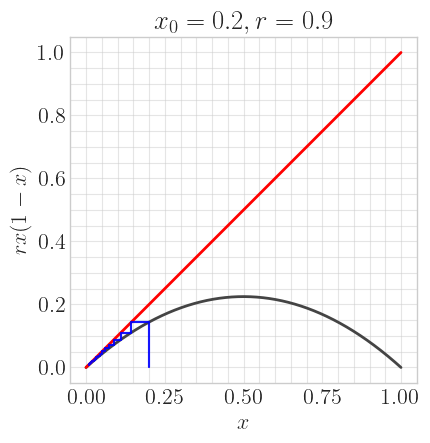

In [ ]:
# The logistic map, f(x) = rx(1-x).
func = AnnotatedFunction(lambda x,r: r*x*(1-x), r'$rx(1-x)$')
plot_cobweb(func, 0.9, 0.2)

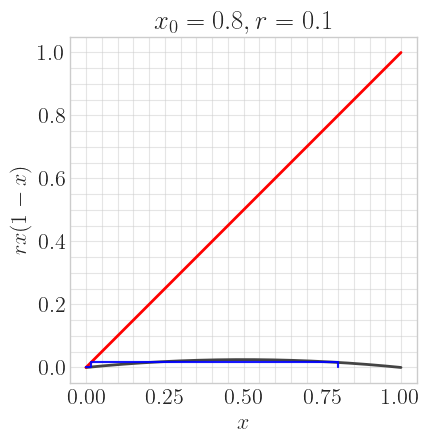

In [ ]:
# The logistic map, f(x) = rx(1-x).
func = AnnotatedFunction(lambda x,r: r*x*(1-x), r'$rx(1-x)$')
plot_cobweb(func, 0.1, 0.8)

Through the analysis of the logistic function $f(x) = r \cdot x(1 - x)$, we have identified an interesting behavior linked to the value of $r$. Particularly, when $r \leq 1$, two notable fixed points emerge: a stable fixed point at $x = 0$ and an unstable fixed point at $x = \frac{r - 1}{r}$.

When $r \leq 1$, the term $r \cdot x(1 - x)$ in the function $f(x)$ is bounded in a way that the system tends to converge towards $x = 0$ with each iteration. Mathematically, this translates to $x = 0$ being a stable fixed point, as $f(0) = r \cdot 0(1 - 0) = 0$, and any value close to $0$ will also be attracted to this point.

Furthermore, it is found that there is a second fixed point at $x = \frac{r - 1}{r}$. This point is unstable due to the relationship between $r$ and the shape of the logistic function. While its stability depends on the choice of $r$, in the range $r \leq 1$, this fixed point tends to push the system's iterations away, and any value close to $\frac{r - 1}{r}$ will diverge with each iteration.

This pattern of behavior reflects how the logistic function can give rise to different types of fixed points based on the value of $r$. In this specific case, the relationship between $r$ and the function's shape determines the stability of the fixed points. The stable fixed point at $x = 0$ acts as an attractor towards which iterations converge, while the unstable fixed point at $x = \frac{r - 1}{r}$ acts as a repulsor pushing iterations away.

***

#### <FONT SIZE=4 COLOR="#619b8a">  **Stable and Unstable Fixed Point** </FONT>


Empirically, we will consider the following examples:

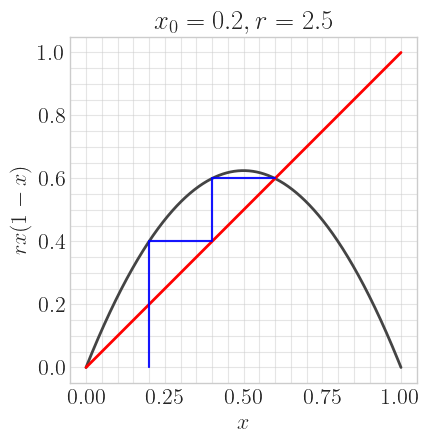

In [ ]:
# The logistic map, f(x) = rx(1-x).
func = AnnotatedFunction(lambda x,r: r*x*(1-x), r'$rx(1-x)$')
plot_cobweb(func, 2.5, 0.2)

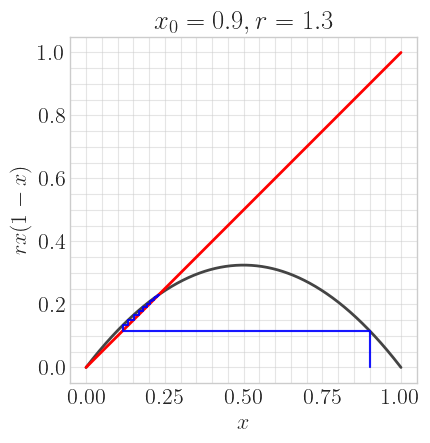

In [ ]:
# The logistic map, f(x) = rx(1-x).
func = AnnotatedFunction(lambda x,r: r*x*(1-x), r'$rx(1-x)$')
plot_cobweb(func, 1.3, 0.9)

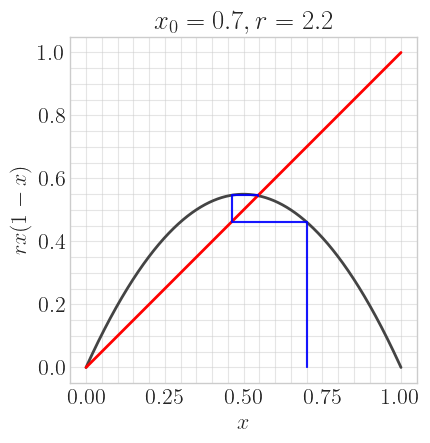

In [ ]:
# The logistic map, f(x) = rx(1-x).
func = AnnotatedFunction(lambda x,r: r*x*(1-x), r'$rx(1-x)$')
plot_cobweb(func, 2.2, 0.7)

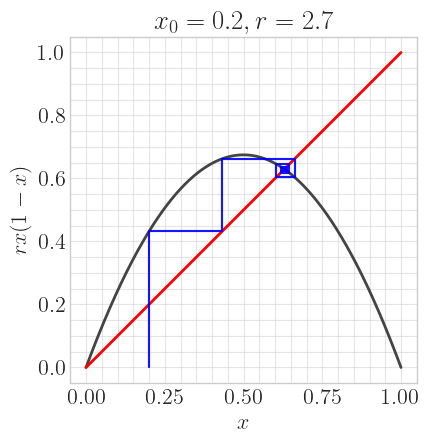

In [ ]:
# The logistic map, f(x) = rx(1-x).
func = AnnotatedFunction(lambda x,r: r*x*(1-x), r'$rx(1-x)$')
plot_cobweb(func, 2.7, 0.2)

Through the analysis of the logistic function $f(x) = r \cdot x(1 - x)$, we have discovered interesting properties that arise when the value of $r$ is within the range $1 < r < 3$. In this specific configuration, two notable fixed points appear: an unstable point at $x = 0$ and a stable point at $x = \frac{r - 1}{r}$.

When $1 < r < 3$, the term $r \cdot x(1 - x)$ in the function $f(x)$ establishes a dynamic where $x = 0$ is an unstable fixed point. This means that any value close to $0$ will diverge with each iteration, as the multiplications by $x$ and $1 - x$ have an effect that pushes iterations away from this point.

On the other hand, a stable fixed point is identified at $x = \frac{r - 1}{r}$. The relationship between $r$ and the shape of the logistic function creates a balance at this value. Successive iterations tend to remain close to this fixed point due to the interaction of the terms $x$ and $1 - x$ multiplied by $r$. Mathematically, this results in a convergence towards this stable fixed point.

This arrangement of fixed points reveals how the logistic function can give rise to a variety of behaviors based on the value of $r$. In this case, the range $1 < r < 3$ demonstrates a dynamic where the unstable fixed point at $x = 0$ acts as a starting point that pushes iterations away, while the stable fixed point at $x = \frac{r - 1}{r}$ attracts and maintains iterations close to it.

***

#### <FONT SIZE=4 COLOR="#619b8a">  **Unstable Fixed Point** </FONT>

Empirically, we will consider the following examples:

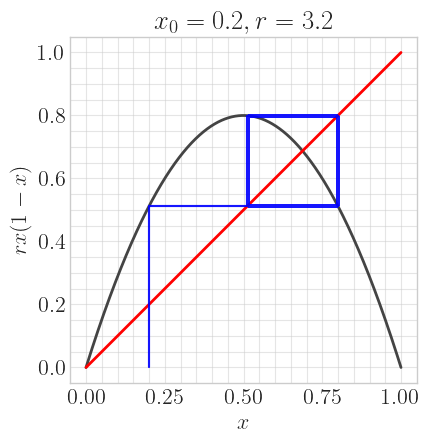

In [ ]:
plot_cobweb(func, 3.2, 0.2, 200)

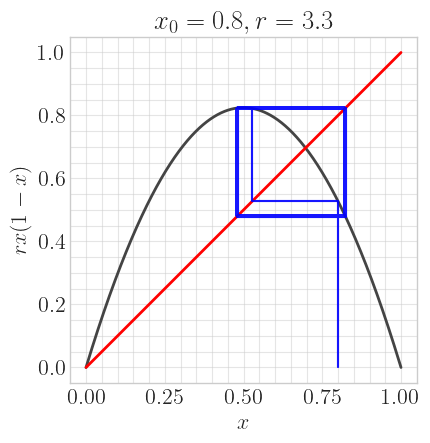

In [ ]:
plot_cobweb(func, 3.3, 0.8, 200)

Through the analysis of the logistic function $f(x) = r \cdot x(1 - x)$, we have identified intriguing behavior in the range of values $3 < r < 3.4$. In this specific setup, two notable fixed points, both repulsive, emerge, and stable periodic orbits are generated around these points. These points are $x = 0$ and $x = \frac{r - 1}{r}$.

When $3 < r < 3.4$, the logistic function $f(x)$ has a dominant term that favors system divergence. The point $x = 0$ is a repulsive fixed point in this range, meaning that any value close to $0$ will exponentially move away from this point with each iteration. Similarly, there is also a repulsive fixed point at $x = \frac{r - 1}{r}$. As in the previous case, any value close to this point will diverge from it with each iteration.

The intriguing dynamics occur due to the interaction between these repulsive fixed points and the value of $r$. Values of $r$ in the range $3 < r < 3.4$ generate stable periodic orbits around these points. As successive iterations are applied, the values of $x$ oscillate between these two fixed points, creating a cyclic dynamic that remains stable over time.

These stable periodic orbits are an example of how the logistic function can give rise to nontrivial and predictable behaviors in dynamic systems. Although the fixed points are repulsive individually, their interaction creates a cyclic dynamic that causes the system to oscillate between the values $x = 0$ and $x = \frac{r - 1}{r}$.

***
***

### <FONT SIZE=5 COLOR="#fcca46">  **2. Formal Definition and Proof** </FONT>

### **Proposition:**

If $f: R \rightarrow R$, $f: x \rightarrow rx(1-x)$ is a logistic equation with $r \in R$. Then we have three case:
- If $r \leq 1$, then there is a stable attractor fixed point at $x=0$ and an unstable fixed point at $x = \frac{r - 1}{r}$.
- If $1 < r < 3$, then there is a stable attractor fixed point at $x = \frac{r - 1}{r}$ and an unstable fixed point at $x=0$.
- If $3 < r < 3.4$, then there are two unstable repulsor fixed points at $x = \frac{r - 1}{r}$ and at $x=0$.


### **Proof**

Sure, let's go through the proof for each case of the logistic equation:

**Case 1: If r ≤ 1, then there is a stable attractor fixed point at $x = 0$ and an unstable fixed point at $x = \frac{r - 1}{r}$.**

1. **Stable Attractor at x = 0:**

   To prove that there's a stable attractor at $x = 0$, we need to show that if we start with any value of x close to 0, the function converges towards 0.

   Consider any value $ε > 0$. We want to find a $δ > 0$ such that if $|x - 0| < δ$, then $|f(x) - 0| < ε$.

   For $r ≤ 1$, notice that the function $f(x) = rx(1 - x)$ is always non-positive in the interval $[0,1]$. So, if you start with x in this interval, $f(x)$ remains non-positive, and it approaches 0 as x gets closer to 0. This shows that 0 is a stable attractor.

2. **Unstable Fixed Point at x = (r - 1) / r:**

   To show that $x = \frac{r - 1}{r}$ is an unstable fixed point, we need to demonstrate that if we start with x close to this value, x moves away from it.

   Consider any value $ε > 0$. We want to find a $δ > 0$ such that if $0 < |x - \frac{r - 1}{r}| < δ$, then $|f(x) - \frac{r - 1}{r}| > ε$.

   Let's calculate $f(x)$ at this point:
   $f(\frac{r - 1}{r}) = r(\frac{r - 1}{r})(1 - \frac{r - 1}{r}) = (r - 1)$.

   Since $r ≤ 1$, $(r - 1)$ is positive. Now, choose $δ = \frac{ε}{r - 1}$. If $|x - \frac{r - 1}{r}| < δ$, then $|f(x) - (r - 1)| < ε$. This means that $f(x)$ gets arbitrarily close to $(r - 1)$, which is greater than $\frac{r - 1}{r}$, as x gets closer to $\frac{r - 1}{r}$. Therefore, $x=\frac{r - 1}{r}$ is an unstable fixed point.

**Case 2: If 1 < r < 3, then there is a stable attractor fixed point at $x = \frac{r - 1}{r}$ and an unstable fixed point at $x = 0$.**

The proof for this case is analogous to Case 1, with the roles of the fixed points reversed.

**Case 3: If 3 < r < 3.4, then there are two unstable repulsor fixed points at $x = \frac{r - 1}{r}$ and at $x = 0$.**

In this case, both fixed points are unstable, and no stable attractor exists.

1. **Unstable Fixed Point at $x = \frac{r - 1}{r}$:**

   We already showed in Case 1 that $x = \frac{r - 1}{r}$ is an unstable fixed point when r ≤ 1. The same argument applies here because 3 < r < 3.4, which includes the range where r ≤ 1.

2. **Unstable Fixed Point at x = 0:**

   To prove that x = 0 is also an unstable fixed point, you can use a similar argument as in Case 1. Consider any $ε > 0$, and find a $δ > 0$ such that if $0 < |x - 0| < δ$, then $|f(x) - 0| > ε$. Since $r > 1$, $f(x) = $rx(1 - x)$ is always positive for x close to 0. Thus, x = 0 is an unstable fixed point.

So, in Case 3, both $x = \frac{r - 1}{r}$ and $x = 0$ are unstable repulsor fixed points.

***
***


### <FONT SIZE=5 COLOR="#fcca46">  **3. Modeling and Behavior of the Logistic Equation** </FONT>

The provided code defines a Python function called `logistic` that models and visualizes the behavior of the logistic equation. The function takes various parameters, including the equation's parameter `R`, the initial value `x0`, the number of iterations `N`, and an optional `png_counter` counter. The function iteratively calculates the values of `x` using the logistic equation and stores these values in a list. Then, it creates a graph that shows how these values change over the iterations.

In [2]:
def logistic (R, x0, N, png_counter):
    x = x0
    x_list = [x0]
    for i in range(N-1):
        x = R * x * (1. - x)
        x_list.append(x)

    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(16, 6), facecolor='lightgray')
    plt.xlabel('The number of iterations')
    plt.ylabel('The value of x')
    plt.title(f'\nLogistic Equation\n\nR={R}  |  x0={x0}\n')
    plt.plot(x_list, 'o:r')
    plt.show()

    if (png_counter != 0):
        plt.savefig(f'logistic_equation_{png_counter}.png')

For example, if $r = 2$, the equation's result will be 0.5 after a maximum of several iterations, and then on all subsequent iterations, the result will be a constant 0.5. (fixed point)

<ipython-input-31-1bc23a7df8e4>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


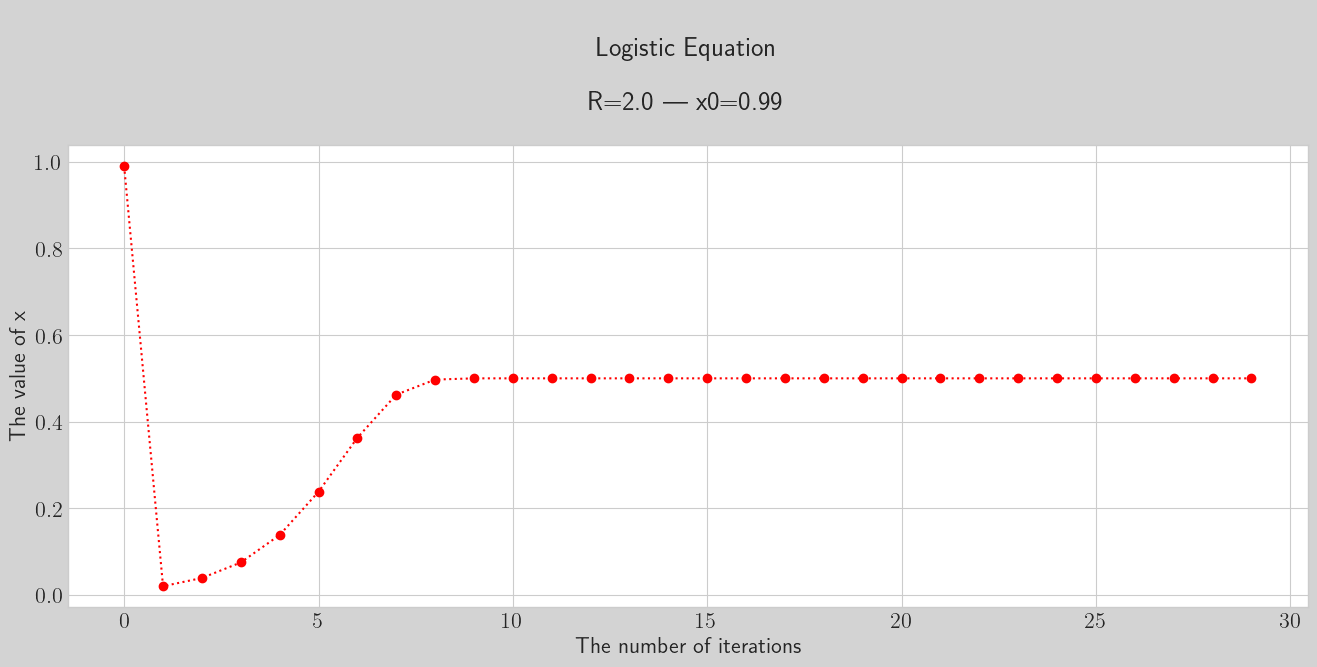

In [ ]:
logistic(2.0, 0.99, 30, 0)

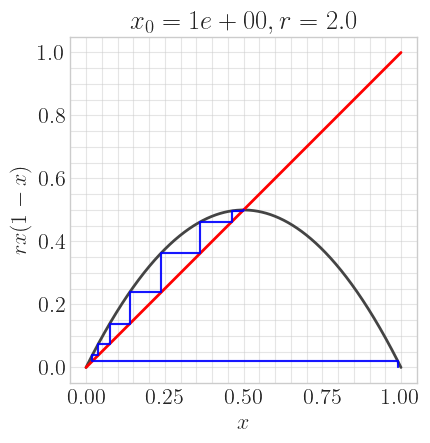

In [ ]:
plot_cobweb(func, 2.0, 0.99, 30)

If $r = 2.5$, the equation's result will be 0.6 after a maximum of several iterations, and then on all subsequent iterations, the result will be a constant 0.6. (fixed point)

<ipython-input-31-1bc23a7df8e4>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


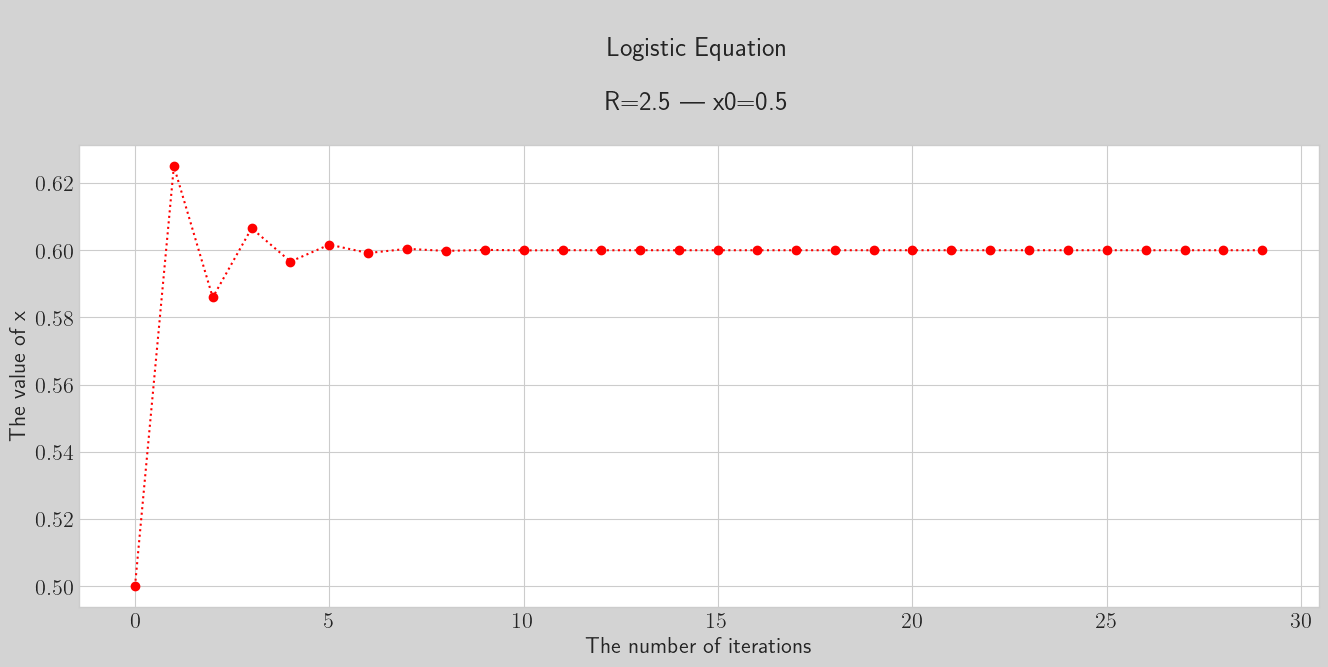

<Figure size 640x480 with 0 Axes>

In [ ]:
logistic(2.5, 0.5, 30, 0)

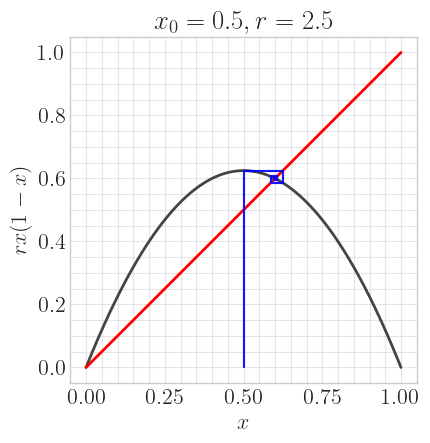

In [ ]:
plot_cobweb(func, 2.5, 0.5, 30)

But if $r$ is slightly greater than the value of 3, for example $r = 3.1$, after a few initial iterations we see that the result of the equation in all subsequent iterations will be two different constant numbers. (Period=2)

<ipython-input-31-1bc23a7df8e4>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


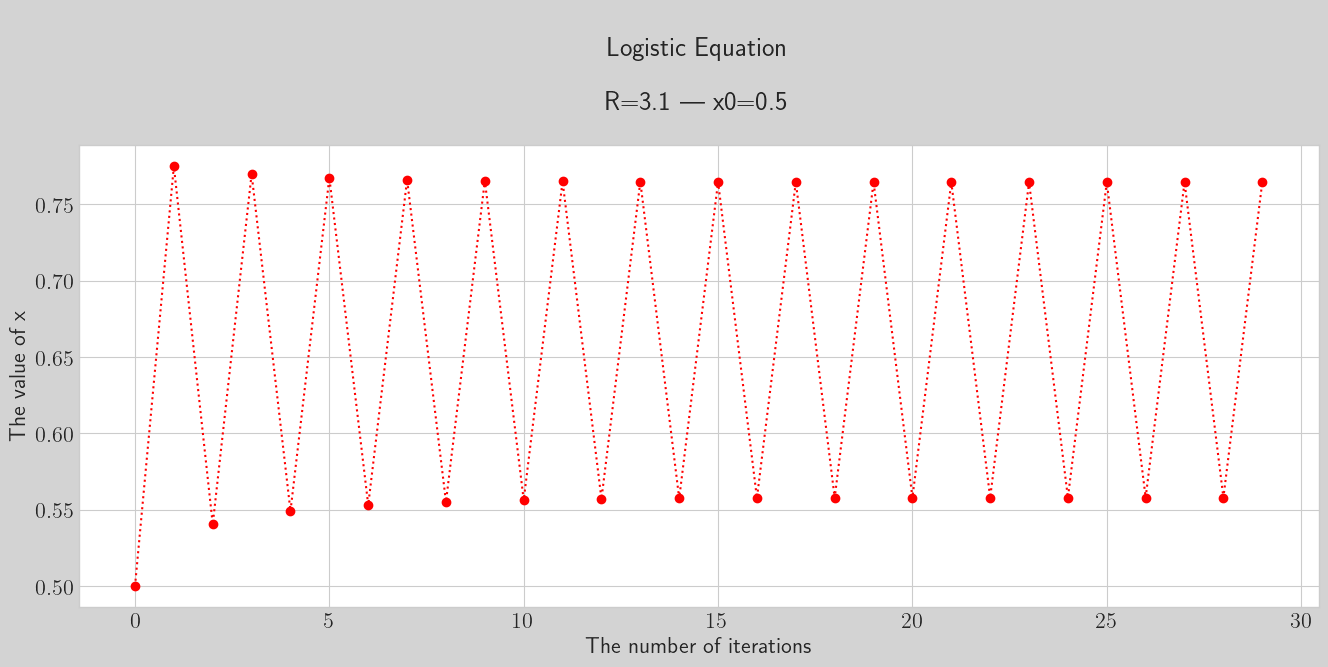

<Figure size 640x480 with 0 Axes>

In [ ]:
logistic(3.1, 0.5, 30, 0)

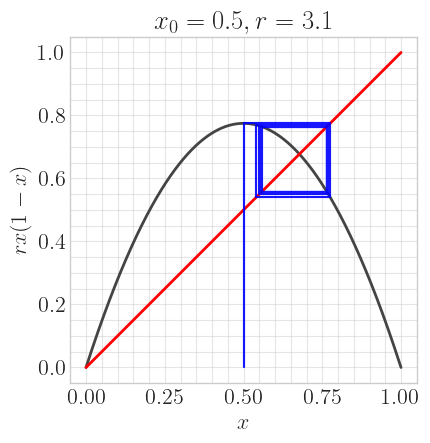

In [ ]:
plot_cobweb(func, 3.1, 0.5, 30)

If we increase the value of $r$ again, say $r = 3.555$, after a few initial iterations we see that this time the equation will result in eight different constant numbers in all subsequent iterations. (Period=8)

<ipython-input-31-1bc23a7df8e4>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


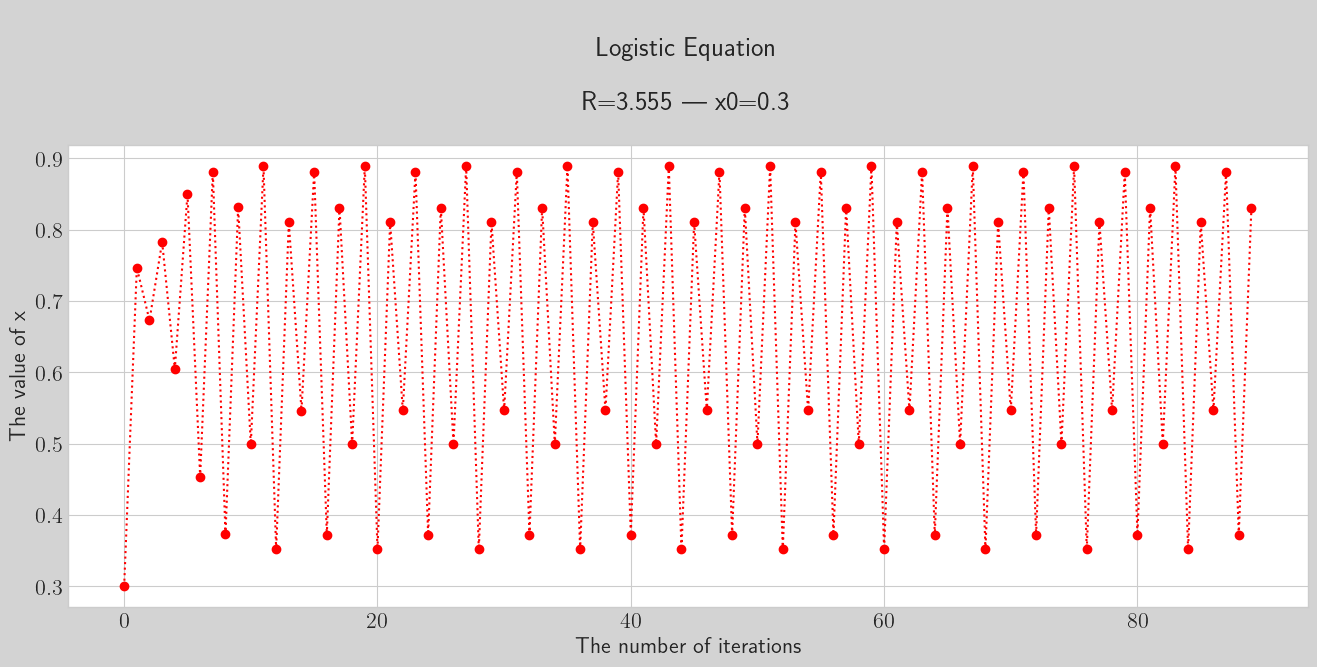

<Figure size 640x480 with 0 Axes>

In [ ]:
logistic(3.555, 0.30, 90, 0)

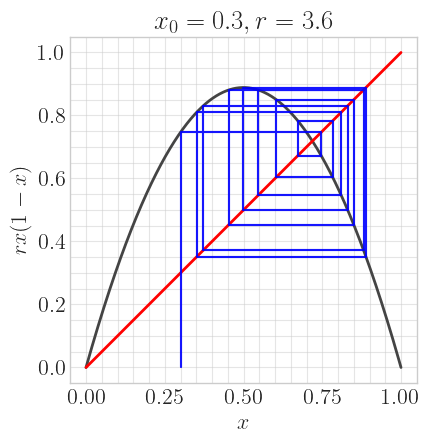

In [ ]:
plot_cobweb(func, 3.555, 0.3, 30)

As you can see, by increasing the value of $r$, each time the number of periods doubles. But if "R = 4.0", something new happens. Even after many initial iterations, all the results in subsequent iterations are different. That is, this equation appears to generate random numbers. This is called Chaos.

<ipython-input-31-1bc23a7df8e4>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


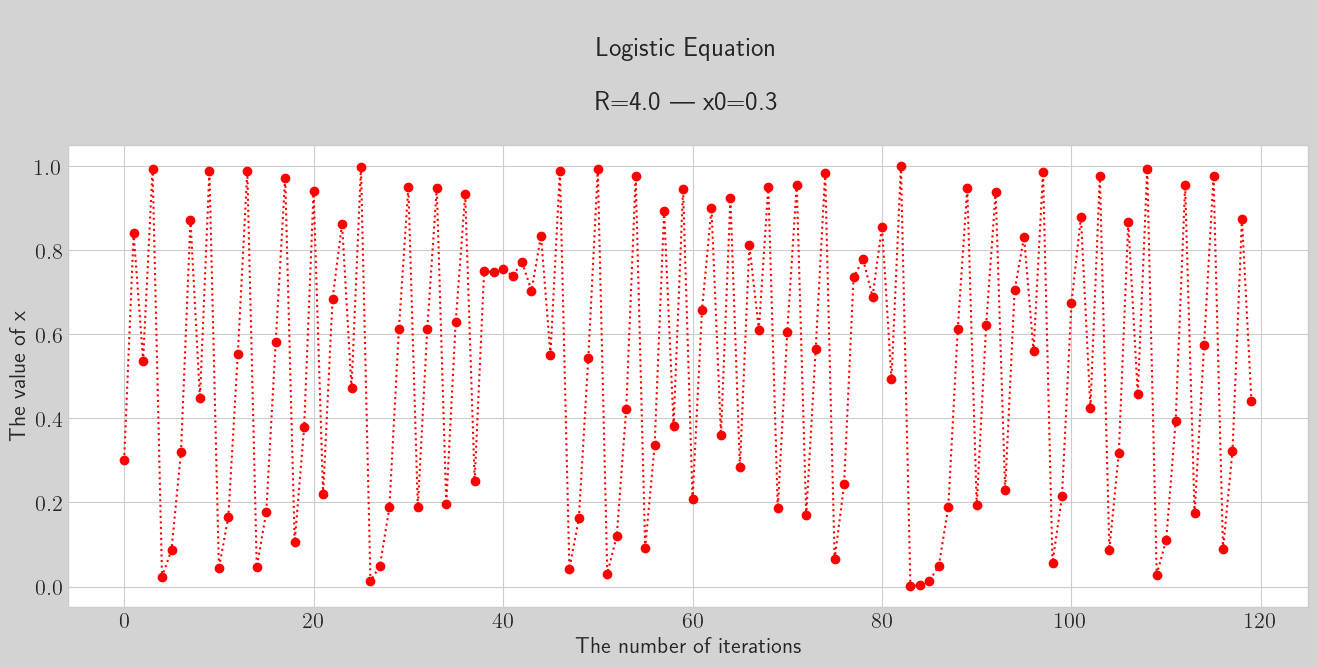

<Figure size 640x480 with 0 Axes>

In [ ]:
logistic(4.0, 0.30, 120, 201)

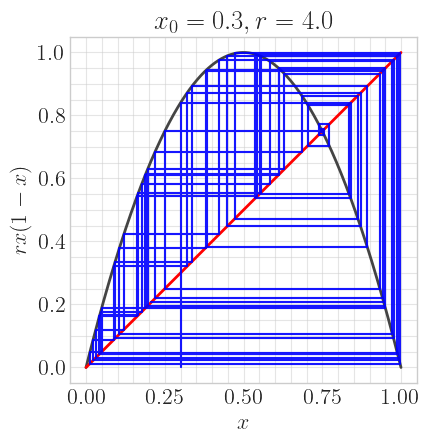

In [ ]:
plot_cobweb(func, 4.0, 0.30, 120)

Another important point is that when it is $r = 4.0$ if the value of $x_0$ changes very, very small, the results of the equation in successive iterations are new random numbers that do not look like the previous results. We will see this phenomenon below.

<ipython-input-31-1bc23a7df8e4>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


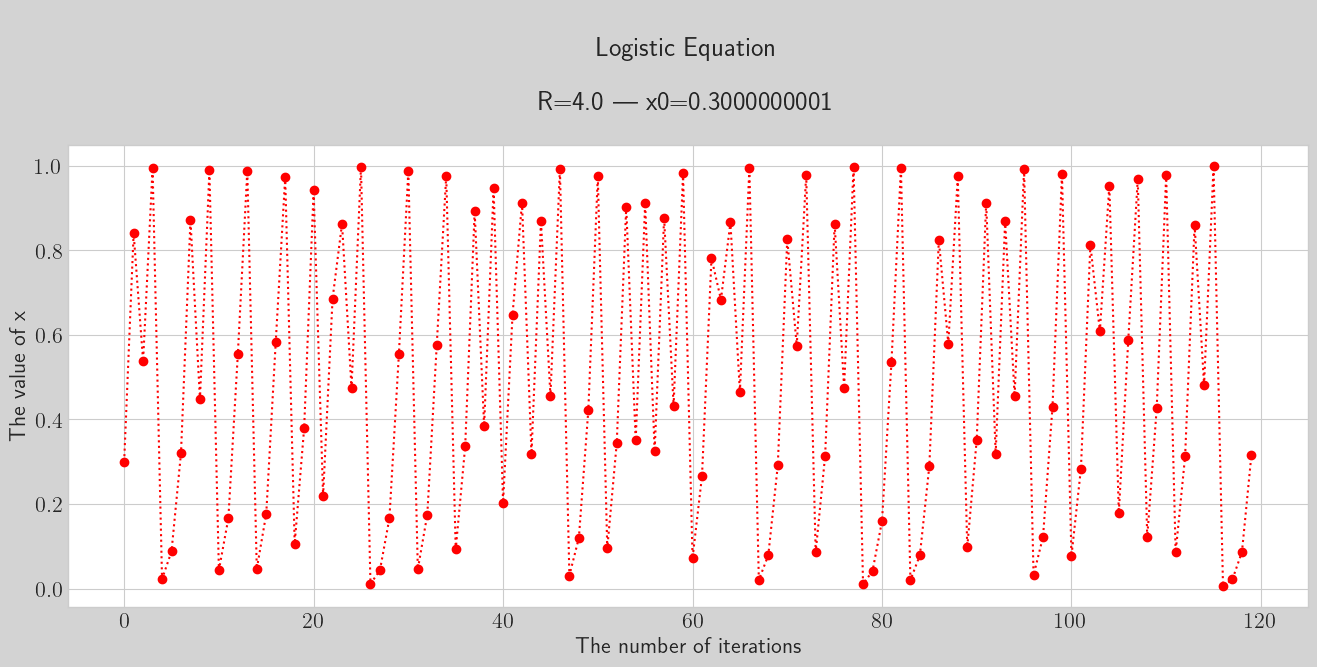

<Figure size 640x480 with 0 Axes>

In [ ]:
logistic(4.0, 0.3000000001, 120, 0)

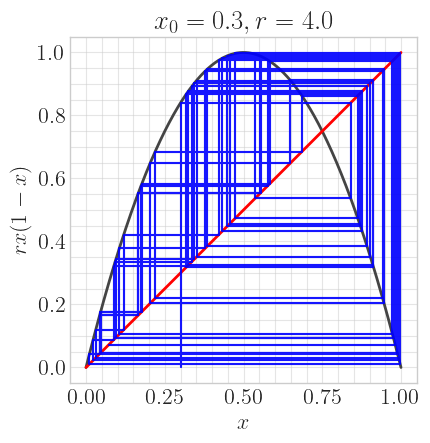

In [ ]:
plot_cobweb(func, 4.0, 0.3000000001, 120)

The two graphs above are totally different.

Now, with the information that you have obtained playing with the data up to this point and the theoretical developments that have been made in class. Explain in detail what the following bifurcation diagram represents. A good idea is, as in the video, to graph it as the bifurcations occur.

<ipython-input-38-f9b5e3e7c87f>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


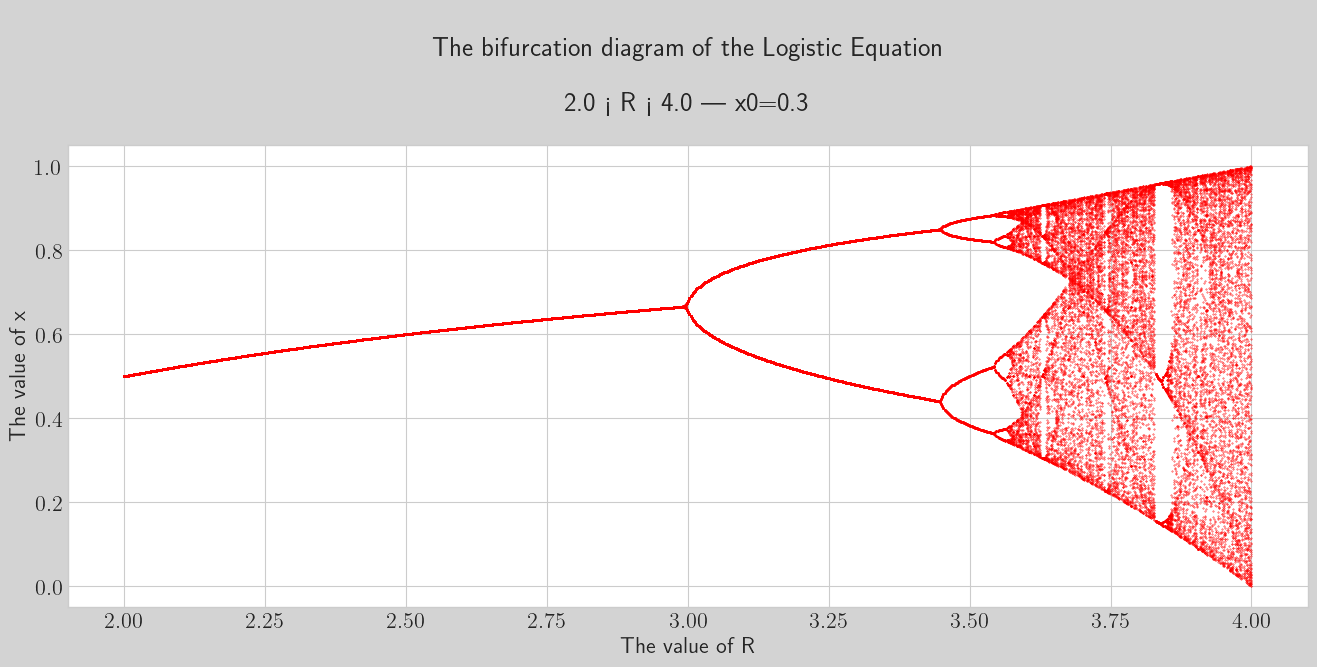

In [ ]:
#El diagrama de bifurcación de la ecuación logística
R_list = np.linspace(2.0, 4.0, 1000)
x0 = 0.3
N = 500

def logis(r):
    x_list = [x0]
    for i in range(N-1):
        x_list.append(r * x_list[-1] * (1 - x_list[-1]))
    return x_list[400:]

x_select = []
R_select = []
for r in R_list:
    x_select.append(logis(r))
    R_select.append([r] * 100)

x_select = np.array(x_select).ravel()
R_select = np.array(R_select).ravel()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16, 6), facecolor='lightgray')
plt.xlabel('The value of R')
plt.ylabel('The value of x')
plt.title(f'\nThe bifurcation diagram of the Logistic Equation\n\n2.0 < R < 4.0  |  x0=0.3\n')
plt.scatter(R_select, x_select, color='red', s=0.1)
plt.savefig('bifurcation_diagram.png')
plt.show()

The bifurcation diagram is a graphical representation of how the solutions of a dynamic equation or system change with respect to a parameter, usually called the "bifurcation parameter." This type of bifurcation diagram is characteristic of the chaotic and nonlinear behavior that can be observed in simple dynamic systems like the logistic equation. The logistic equation is a simple model used to describe the growth of a population over time. The logistic equation looks like this:

$x_{n+1} = r \cdot x_n \cdot (1 - x_n)$

where:
- $x_{n+1}$ is the population at time $n+1$.
- $x_n$ is the population at time $n$.
- $r$ is the bifurcation parameter, which controls the population growth rate.

In this case, the bifurcation diagram for the logistic equation with $x_0 = 3$ and $r$ ranging from 2 to 4 exhibits a pattern of bifurcations that resembles a series of branching points, where they split into two or more branches as $r$ increases. Particularly, for values of $r$ in the range of 2.0 to approximately 3.0, the system exhibits stable behavior, and the value of $x$ does not change drastically. This is reflected in the continuous line of red points in that part of the graph.

As $r$ increases beyond approximately 3.0, bifurcations in the system's behavior begin to appear. This means that for certain values of $r$ in that range, the system has two or more possible values of $x$ after a large number of iterations. As $r$ continues to increase, these bifurcations split into more branches, giving rise to a fractal pattern characteristic of the logistic equation. The most prominent bifurcation often occurs around $r≈3.5$.

In [ ]:
#Constante de Feigenbaum
(3.449490-3)/(3.544090-3.449490)

4.751479915433391

Feigenbaum's constant, denoted as δ, is a remarkable mathematical constant that has captured the fascination of mathematicians and scientists for its appearance in the study of chaos theory and nonlinear dynamics. This dimensionless number, named after American mathematician Mitchell J. Feigenbaum, arises in the context of bifurcation theory.

What makes Feigenbaum's constant so intriguing is its universality: it seems to appear in a wide range of natural and artificial systems, from fluid dynamics to biological processes to financial markets.  It has also been found in physical systems, such as in the phase transition in thermodynamic systems.

Despite its mysterious ubiquity, the exact value of δ remains an unsolved mathematical problem, estimated at approximately the value previously presented. Researchers continue to delve deeper into the meaning of this constant, deepening our understanding of the chaotic nature of the world around us.

This time instead of simply finding the results and plotting them, for each value of $r$, we get all the solutions of the equation in successive iterations and put them into a defined set. We then count the number of non-repeating numbers in each of these sets. Finally, we draw the results of the count on a diagram.

<ipython-input-100-009769701079>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


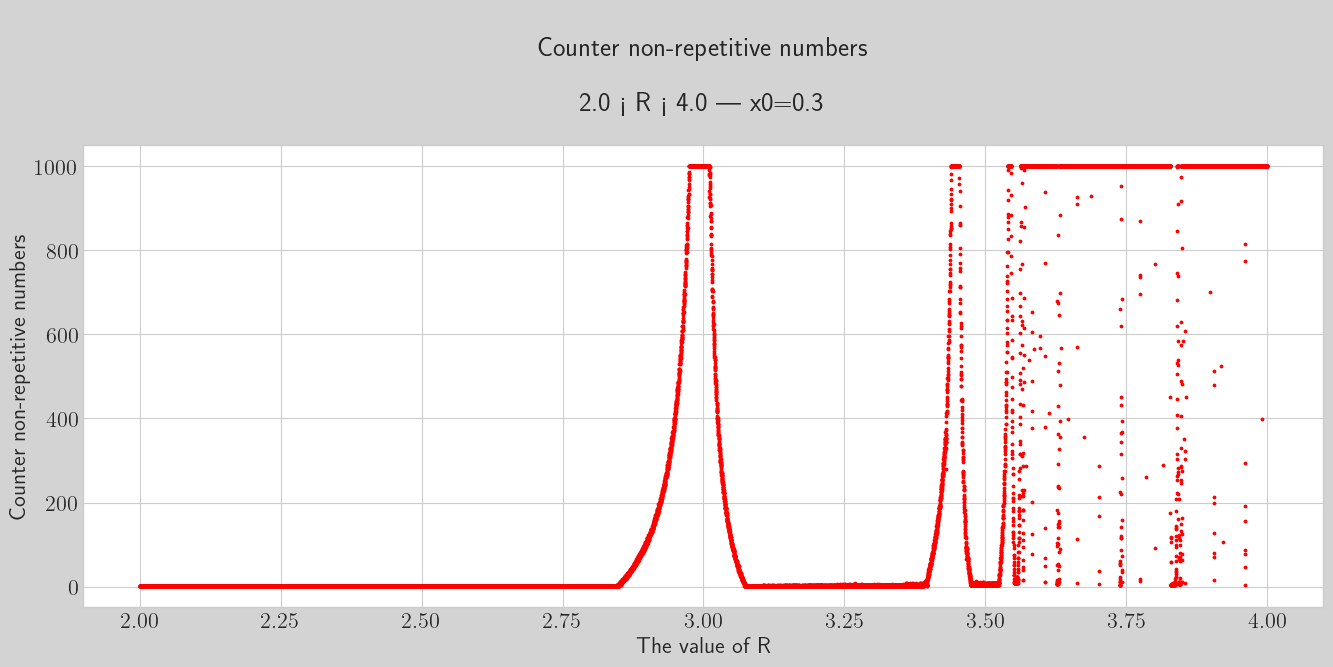

In [ ]:
#Cuántas veces se repiten los valores?
R_list = np.linspace(2.0, 4.0, 20000)
x0 = 0.3
N = 1200

def logis(r):
    x_list = [x0]
    for i in range(N-1):
        x_list.append(r * x_list[-1] * (1 - x_list[-1]))
    return x_list[200:]

non_repetitive = []
for r in R_list:
    non_repetitive.append(len(Counter(logis(r))))

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16, 6), facecolor='lightgray')
plt.xlabel('The value of R')
plt.ylabel('Counter non-repetitive numbers')
plt.title(f'\nCounter non-repetitive numbers\n\n2.0 < R < 4.0  |  x0=0.3\n')
plt.scatter(R_list, non_repetitive, color='red', s=3)
plt.savefig('non_repetitive_numbers.png')
plt.show()

This code generates a graph that shows how the number of non-repeating values in the sequences of the logistic equation varies with different values of R in the range of 2.0 to 4.0. This provides information about the complexity and diversity of behaviors that the logistic equation can exhibit for different values of its parameter R. Particularly, for values of $r=3$, the range $r \leq 3.5$ exhibits the highest variability of values, resulting in a greater number of bifurcations.

In [ ]:
R_list = [2.8, 3.0, 3.2, 3.4494897, 3.5, 3.5440903, 3.55, 3.5644073, 3.566, 3.5687594 ,3.569, 3.5696916, 3.5697, 4.0]
x0 = 0.3
N = 10001000

def logis(r):
    x_list = [x0]
    for i in range(N-1):
        x_list.append(r * x_list[-1] * (1 - x_list[-1]))
    return x_list[10000000:]
results= pd.DataFrame()

for r in R_list:
    results[f'R={r}'] = logis(r)
    non_repetitive = len(Counter(logis(r)))
    print(f'When R={r} the number of non-repetitive numbers is equal to:  {non_repetitive}')
    print('::' * 38)

print('\n\nTable of all results:')
print('='* 22 , '\n')
display(results)
display(results.describe().transpose())

When R=2.8 the number of non-repetitive numbers is equal to:  1
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.0 the number of non-repetitive numbers is equal to:  1000
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.2 the number of non-repetitive numbers is equal to:  2
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.4494897 the number of non-repetitive numbers is equal to:  1000
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.5 the number of non-repetitive numbers is equal to:  4
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.5440903 the number of non-repetitive numbers is equal to:  1000
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.55 the number of non-repetitive numbers is equal to:  8
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

,R=2.8,R=3.0,R=3.2,R=3.4494897,R=3.5,R=3.5440903,R=3.55,R=3.5644073,R=3.566,R=3.5687594,R=3.569,R=3.5696916,R=3.5697,R=4.0
0,0.642857,0.666741,0.799455,0.439981,0.382820,0.363291,0.370326,0.374784,0.344955,0.343409,0.343136,0.343454,0.343419,0.429416
1,0.642857,0.666592,0.513045,0.849946,0.826941,0.819786,0.827805,0.835215,0.805777,0.804681,0.804430,0.804942,0.804904,0.980071
2,0.642857,0.666741,0.799455,0.439940,0.500884,0.523593,0.506031,0.490572,0.558081,0.560899,0.561483,0.560479,0.560562,0.078125
3,0.642857,0.666592,0.513045,0.849929,0.874997,0.884050,0.887371,0.890785,0.879470,0.878954,0.878758,0.879366,0.879332,0.288088
4,0.642857,0.666741,0.799455,0.439981,0.382820,0.363290,0.354800,0.346771,0.378004,0.379693,0.380248,0.378678,0.378771,0.820372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.642857,0.666592,0.513045,0.849929,0.874997,0.884050,0.887371,0.890785,0.879470,0.878954,0.878758,0.879366,0.879400,0.040884
996,0.642857,0.666741,0.799455,0.439981,0.382820,0.363290,0.354800,0.346771,0.378004,0.379693,0.380248,0.378678,0.378588,0.156849
997,0.642857,0.666592,0.513045,0.849946,0.826941,0.819784,0.812656,0.807412,0.838427,0.840537,0.841069,0.839880,0.839805,0.528989
998,0.642857,0.666741,0.799455,0.439940,0.500884,0.523597,0.540475,0.554257,0.483076,0.478338,0.477075,0.480057,0.480242,0.996639


,count,mean,std,min,25%,50%,75%,max
R=2.8,1000.0,0.642857,1.110779e-16,6.428571e-01,0.642857,0.642857,0.642857,0.642857
R=3.0,1000.0,0.666667,7.457080e-05,6.665921e-01,0.666592,0.666667,0.666741,0.666741
R=3.2,1000.0,0.656250,1.432771e-01,5.130445e-01,0.513045,0.656250,0.799455,0.799455
R=3.4494897,1000.0,0.644949,2.050914e-01,4.399396e-01,0.439970,0.644955,0.849934,0.849946
R=3.5,1000.0,0.646410,2.095691e-01,3.828197e-01,0.471368,0.663912,0.838955,0.874997
R=3.5440903,1000.0,0.647680,2.132764e-01,3.632895e-01,0.483517,0.671691,0.835852,0.884050
R=3.55,1000.0,0.647643,2.140385e-01,3.548004e-01,0.472104,0.676565,0.841275,0.887371
R=3.5644073,1000.0,0.647551,2.158794e-01,3.467575e-01,0.461625,0.680843,0.846561,0.890790
R=3.566,1000.0,0.647566,2.160451e-01,3.449546e-01,0.456808,0.681929,0.848688,0.891492
R=3.5687594,1000.0,0.647596,2.163299e-01,3.434091e-01,0.453677,0.682790,0.850141,0.892140


This code calculates the evolution of the logistic equation for a range of values of $R$ and then presents the results of evaluating different bifurcation parameters in the logistic equation. This process is repeated a total of 1000 times, counting the number of non-repeating values in the resulting sequence.

Since a large number of iterations $N=1000$ were chosen, quite long sequences of $x$ values were obtained for each value of $R$. It was observed that as $R$ approaches certain critical values (such as $R≈3$, $R≈3.4494$, $R≈3.5440$, $R≈3.5644$, $R≈3.5687$, $R≈3.5696$, and $R≈4$), the number of non-repeating values increases, indicating that the system is exhibiting chaotic behavior and is highly sensitive to initial conditions.

This demonstrates how small variations in initial conditions or parameters can lead to extremely different behaviors in nonlinear dynamic systems like the logistic equation.

To complete this description, we plot the variance of all response lists on a plot.Explain what is about of this plot

<ipython-input-42-841213dd44a8>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


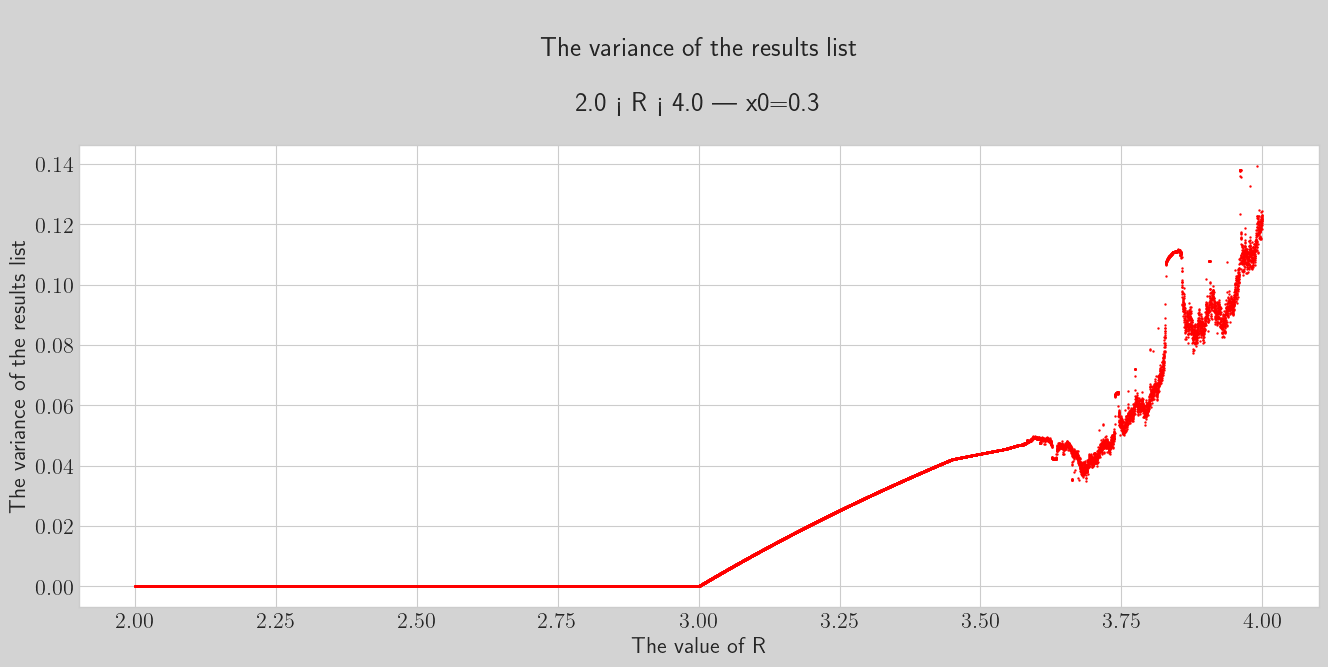

In [ ]:
#Variación de resultados de un punto
R_list = np.linspace(2.0, 4.0, 20000)
x0 = 0.3
N = 1200

def logis(r):
    x_list = [x0]
    for i in range(N-1):
        x_list.append(r * x_list[-1] * (1 - x_list[-1]))
    return x_list[200:]

variances_list = []
for r in R_list:
    variances_list.append(statistics.variance(logis(r)))

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16, 6), facecolor='lightgray')
plt.xlabel('The value of R')
plt.ylabel('The variance of the results list')
plt.title(f'\nThe variance of the results list\n\n2.0 < R < 4.0  |  x0=0.3\n')
plt.scatter(R_list, variances_list, color='red', s=0.5)
plt.savefig('results_variance.png')
plt.show()

This code calculates the variance of the resulting sequences from the logistic equation for different values of $R$ and then displays a graph showing how the variance changes as a function of $R$. The red points on the graph indicate how chaotic or predictable the system's behavior is for different values of $R$.

In areas where the variance is low, the system is more predictable and stable, as is the case for $2 < R < 3$. Meanwhile, in areas where the variance is high, $3 < R$, the system exhibits chaotic behavior and is highly sensitive to initial conditions or small variations in $R$.


***
***
***

## <FONT SIZE=6 COLOR="#fe7f2d">  **Chaos** </FONT>

Chaos is an exceedingly rare phenomenon in mathematics, where we are accustomed to grids and perfect calculations, simple and straightforward things. It's strange that a system made up of numbers and basic operations, with initial conditions in a deterministic system, can exhibit levels of randomness and unpredictability.

Chaos in a dynamic system is a state characterized by unpredictable, sensitive, and highly complex behavior. The trajectory of a chaotic system can appear unpredictable even though it follows well-defined mathematical rules. Chaos is associated with strange attractors and fractal structures.

From all of the above, we can extract certain characteristics:

1. **Sensitivity to Initial Conditions:** Small differences in initial conditions can lead to significantly different outcomes, a very peculiar butterfly effect.

2. **Bifurcations and Fractality:** As the parameters of a chaotic system are adjusted, bifurcations occur, leading to fractal patterns in bifurcation diagrams.

3. **Pseudo-Randomness:** Despite chaos being deterministic in nature, it can appear random due to the complexity of interactions within the system.

4. **Difficulty of Prediction:** In chaotic systems, precise long-term prediction becomes practically impossible due to sensitivity to initial conditions and the lack of discernible structure in behavior.

***
***
***

In [ ]:
%%shell
jupyter nbconvert --to html /content/MDS_IMPORTANTE.ipynb

[NbConvertApp] Converting notebook /content/MDS_IMPORTANTE.ipynb to html
[NbConvertApp] Writing 2815829 bytes to /content/MDS_IMPORTANTE.html
